In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [0]:
data = pd.read_csv("AAPL.csv")

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
dataset = data["Close"]

In [0]:
dataset = list(dataset)

In [0]:
cleanedList = [x for x in dataset if str(x) != 'nan']

In [7]:
len(cleanedList)

9797

In [8]:
len(dataset)

9798

In [0]:
dataset= cleanedList
dataset = np.asarray(dataset)
dataset= dataset.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset= sc.fit_transform(dataset)

In [0]:

xdata = dataset[:9000]

In [0]:
ydata=dataset[9000:]

In [0]:
def create_training_dataset(dataset, n_steps, n_outputs):
    dataX, dataY = [], []
    for i in range(8000):
        x = dataset[i]
        y = dataset[i+1]
        dataX.append(x)
        dataY.append(y)
    dataX, dataY =  np.array(dataX), np.array(dataY)
    dataX = np.reshape(dataX, (-1, n_steps, n_outputs))
    dataY = np.reshape(dataY, (-1, n_steps, n_outputs))    
    return dataX, dataY

In [0]:
n_steps = 1000
n_iterations = 10000
n_inputs = 1 # one input per time step
n_neurons = 120 # one hidden layer
n_outputs = 1 # output layer
learning_rate = 0.0001


In [0]:
dataX, dataY = create_training_dataset(xdata, n_steps, n_outputs)

In [15]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
        output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


0 	MSE 0.007914968


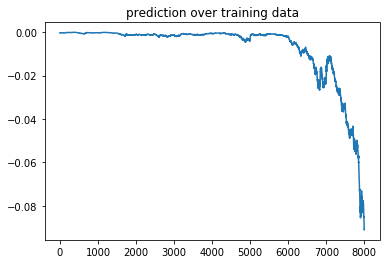

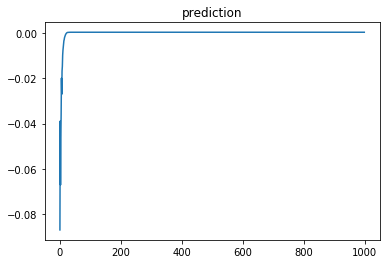

20 	MSE 0.005597777


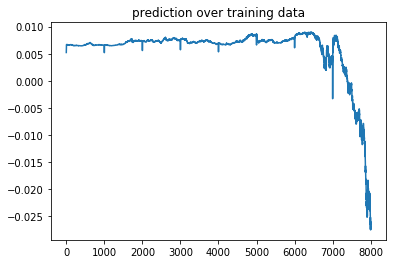

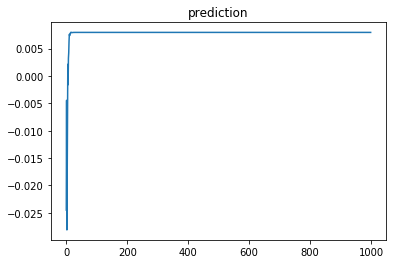

40 	MSE 0.004189563


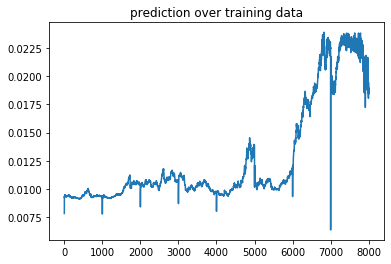

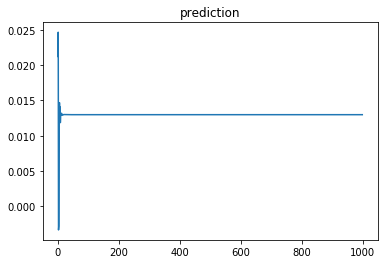

60 	MSE 0.0030061747


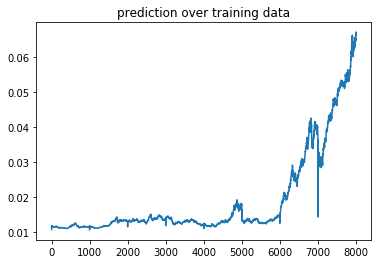

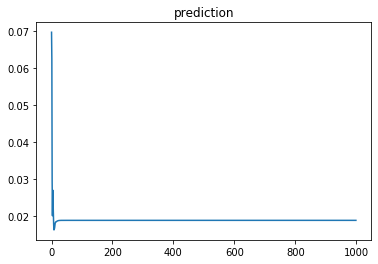

80 	MSE 0.0017873578


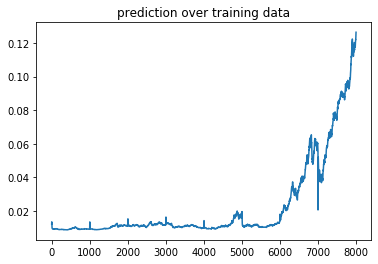

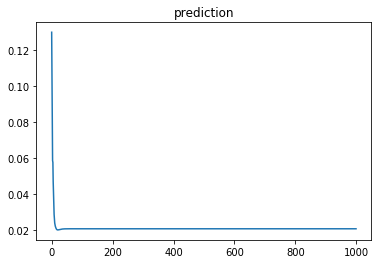

100 	MSE 0.0003638159


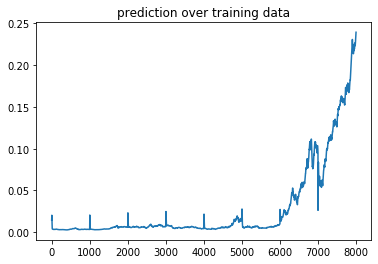

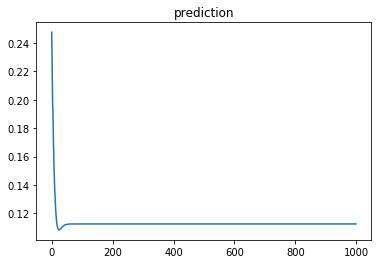

120 	MSE 1.5127192e-05


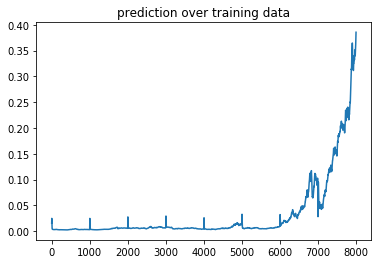

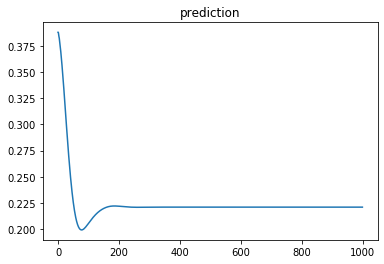

140 	MSE 8.241546e-06


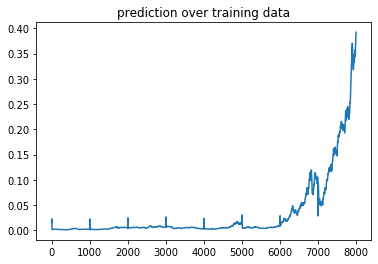

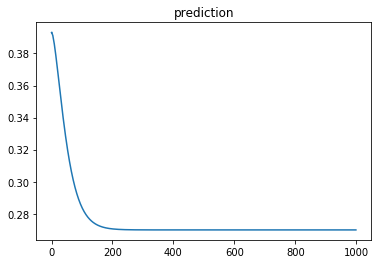

160 	MSE 6.6232924e-06


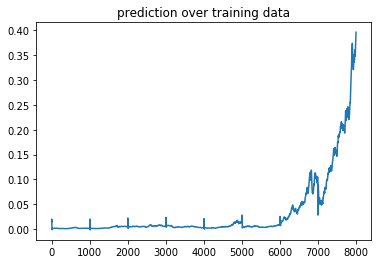

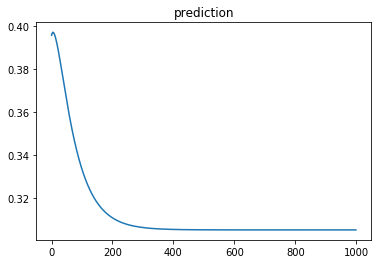

180 	MSE 5.83712e-06


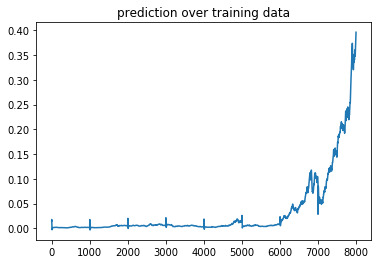

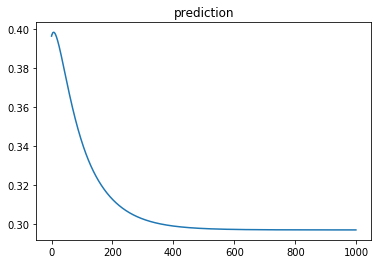

200 	MSE 5.5000114e-06


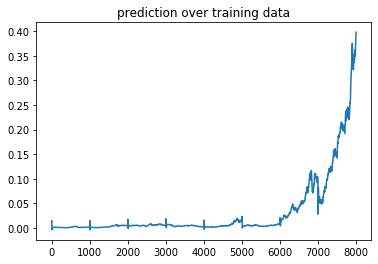

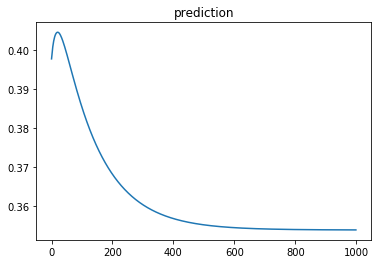

220 	MSE 5.208808e-06


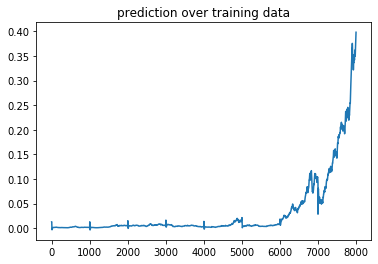

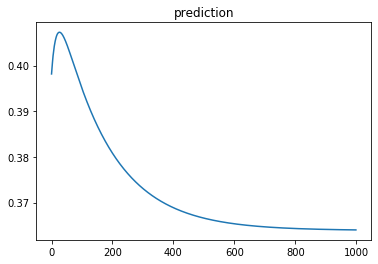

240 	MSE 4.908518e-06


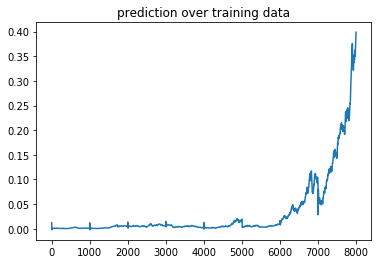

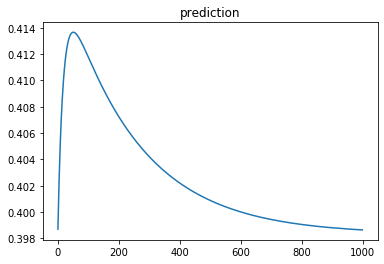

260 	MSE 4.732393e-06


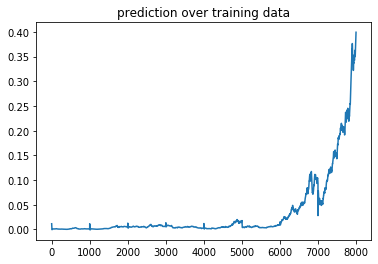

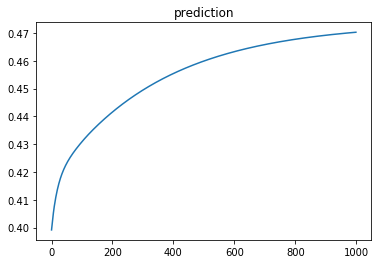

280 	MSE 4.6395894e-06


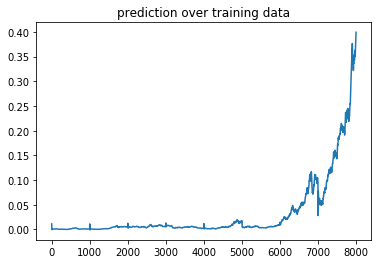

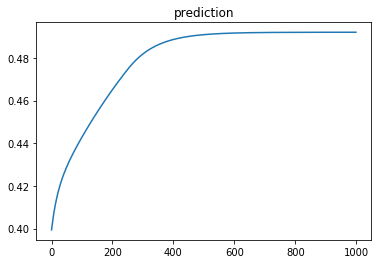

300 	MSE 4.586499e-06


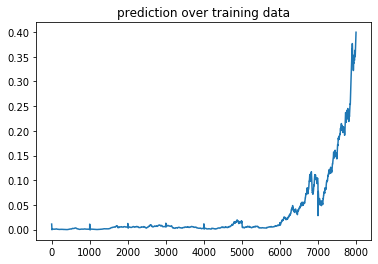

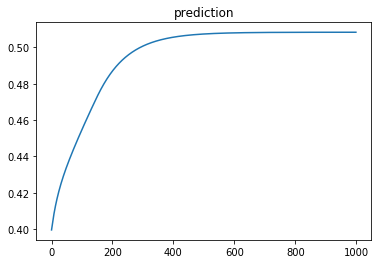

320 	MSE 4.542806e-06


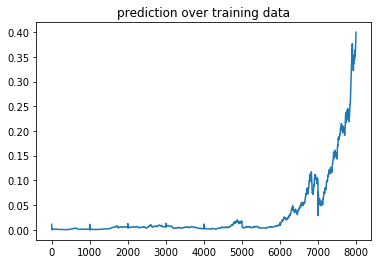

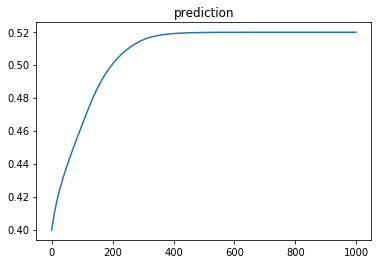

340 	MSE 4.4916214e-06


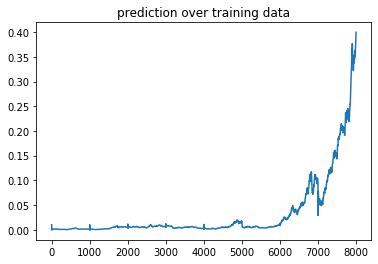

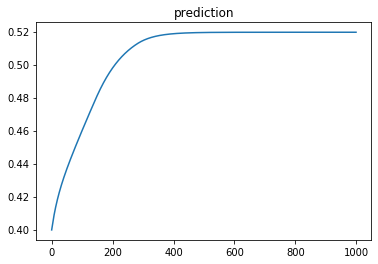

360 	MSE 4.4382796e-06


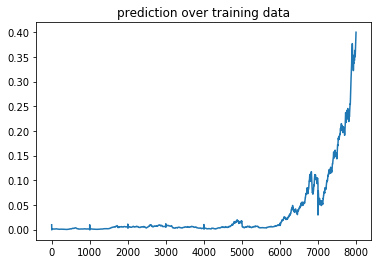

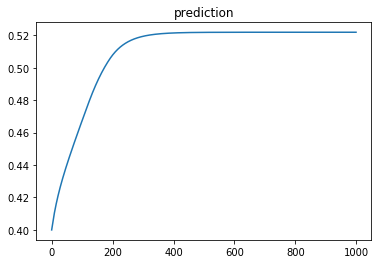

380 	MSE 4.4026942e-06


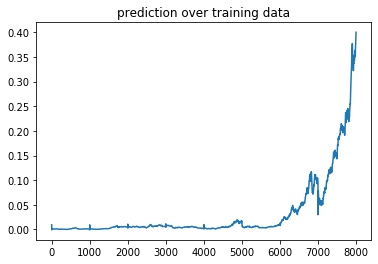

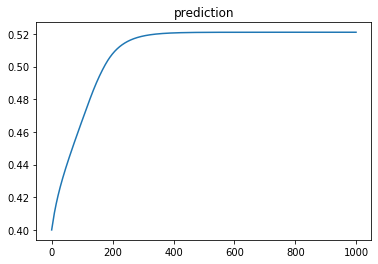

400 	MSE 4.391594e-06


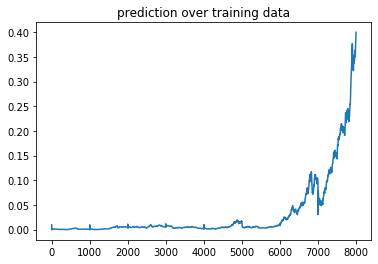

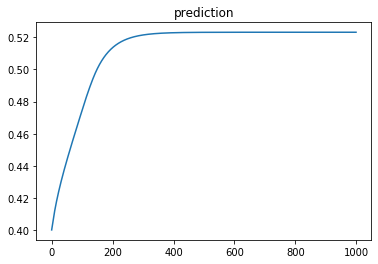

420 	MSE 4.3529535e-06


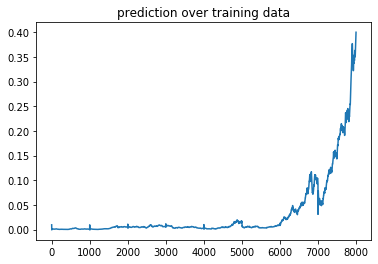

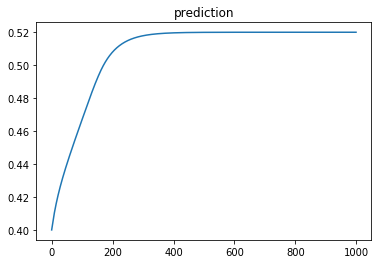

440 	MSE 4.3263412e-06


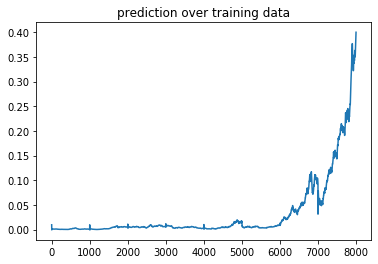

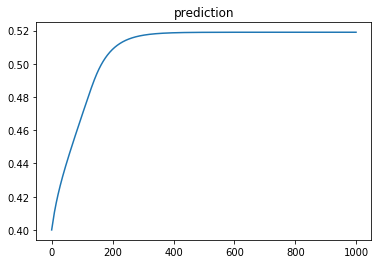

460 	MSE 4.309458e-06


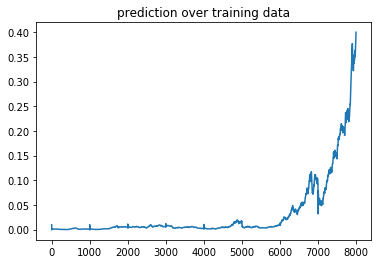

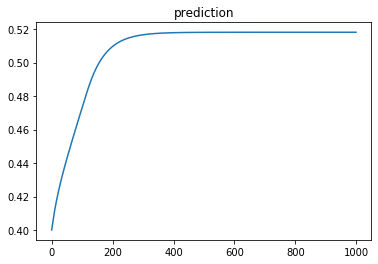

480 	MSE 4.2831048e-06


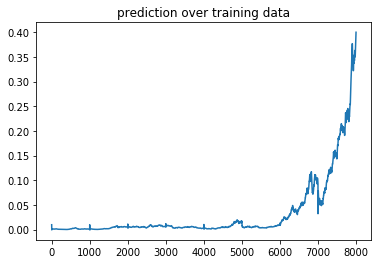

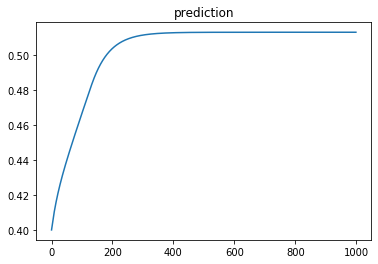

500 	MSE 4.2548577e-06


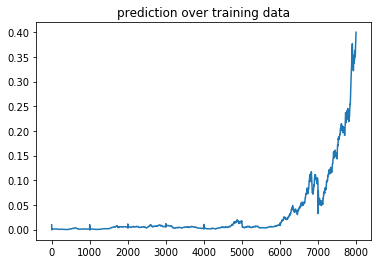

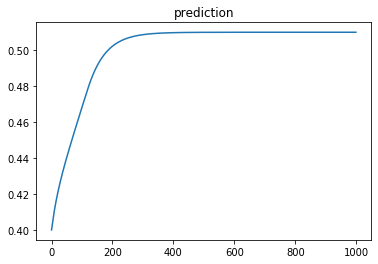

520 	MSE 4.2704614e-06


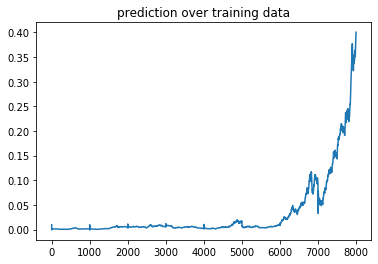

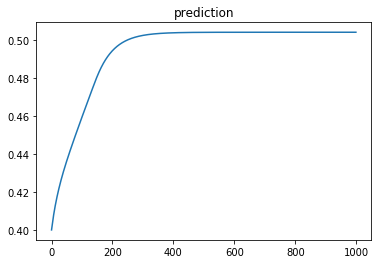

540 	MSE 4.2077672e-06


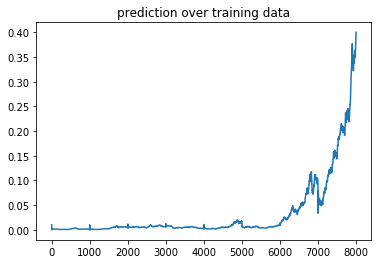

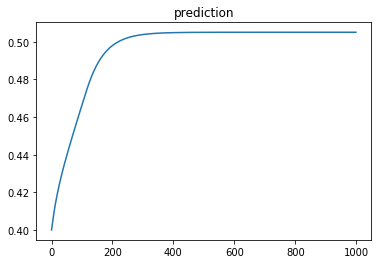

560 	MSE 4.179392e-06


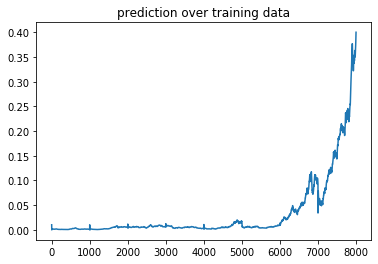

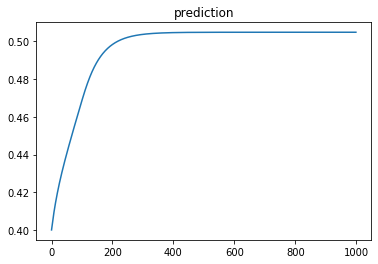

580 	MSE 4.1575336e-06


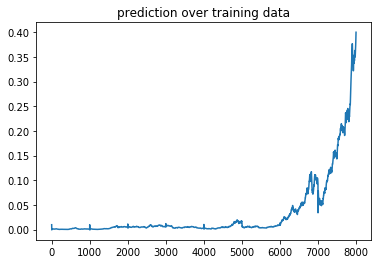

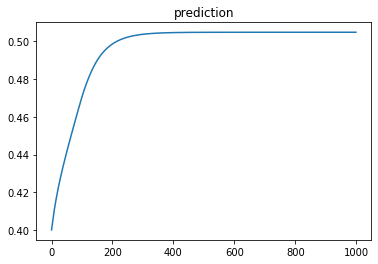

600 	MSE 4.1713847e-06


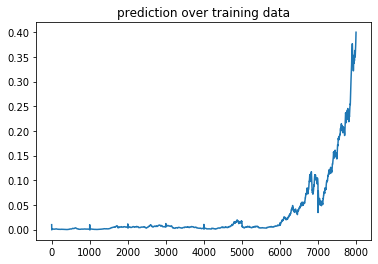

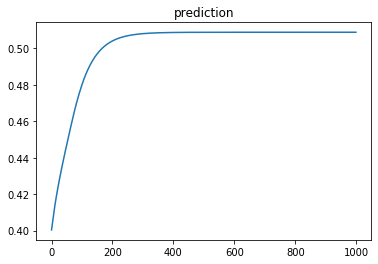

620 	MSE 4.1255093e-06


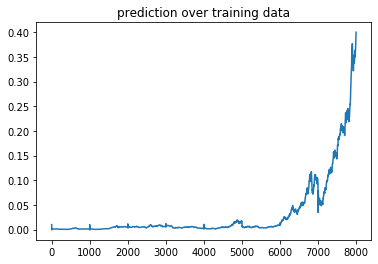

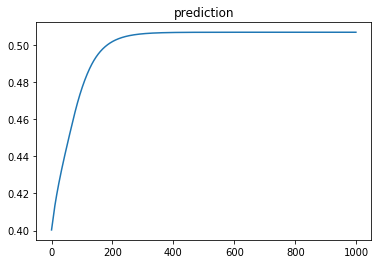

640 	MSE 4.1021403e-06


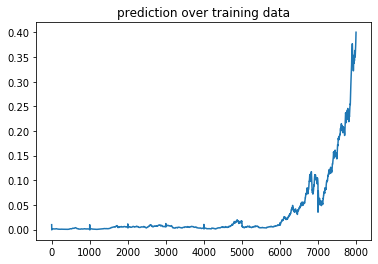

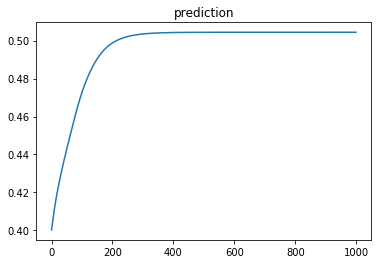

660 	MSE 4.0838836e-06


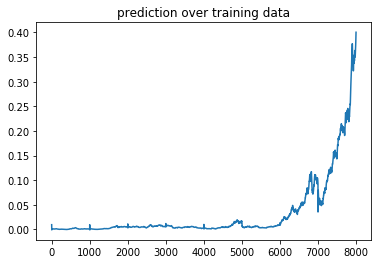

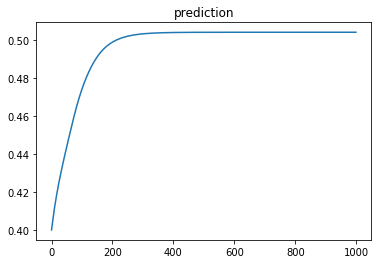

680 	MSE 4.0670166e-06


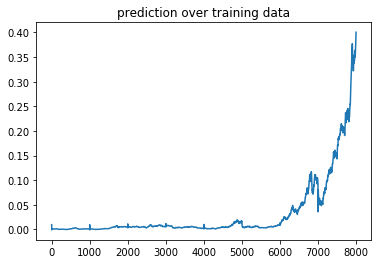

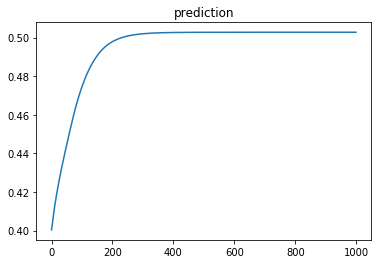

700 	MSE 4.226512e-06


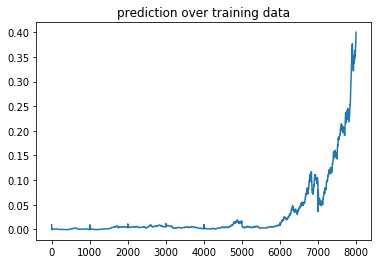

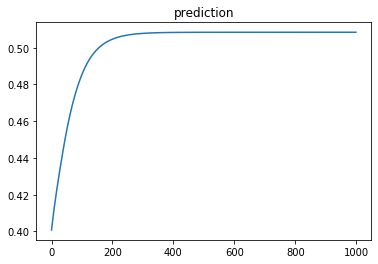

720 	MSE 4.0577333e-06


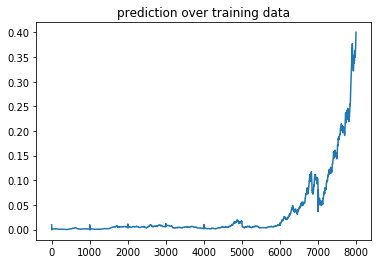

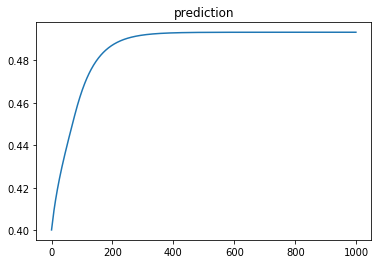

740 	MSE 4.0215778e-06


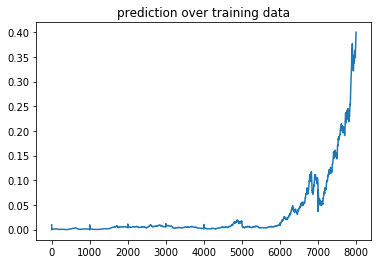

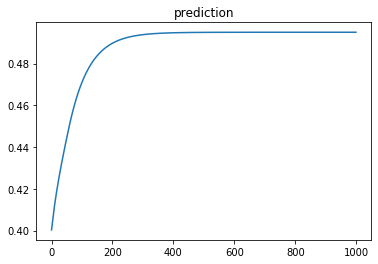

760 	MSE 4.0059786e-06


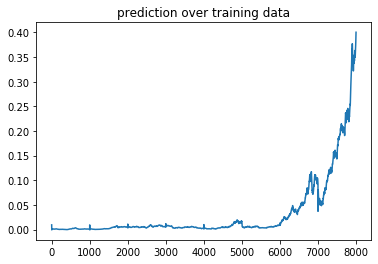

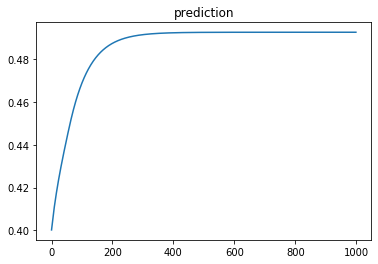

780 	MSE 3.9921674e-06


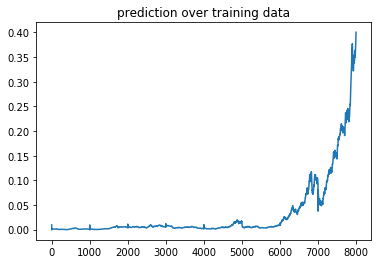

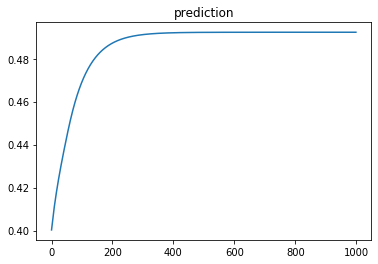

800 	MSE 3.978875e-06


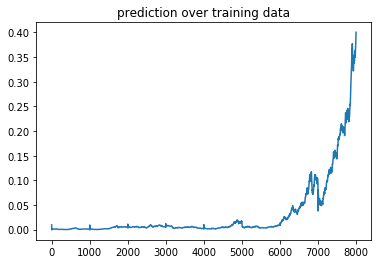

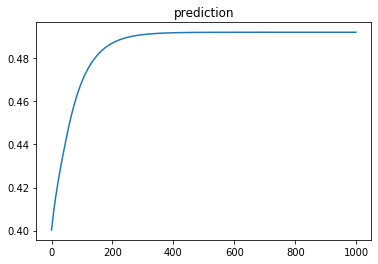

820 	MSE 3.9658185e-06


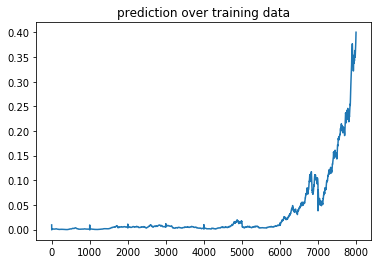

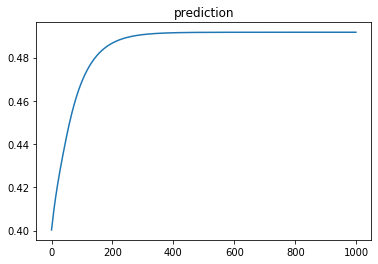

840 	MSE 3.9531756e-06


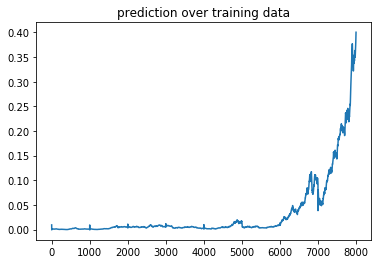

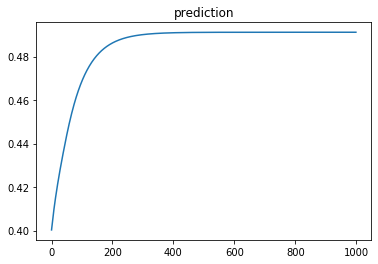

860 	MSE 4.0759846e-06


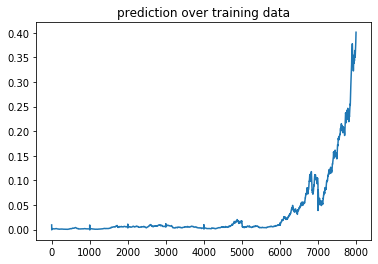

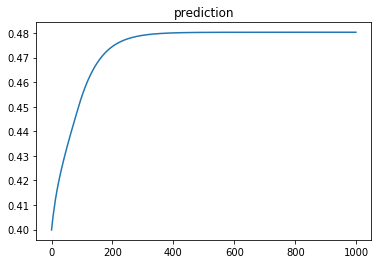

880 	MSE 3.931709e-06


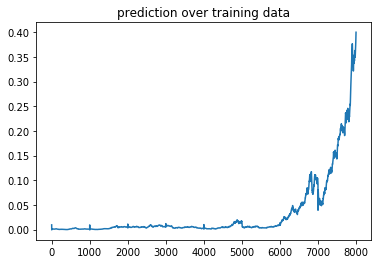

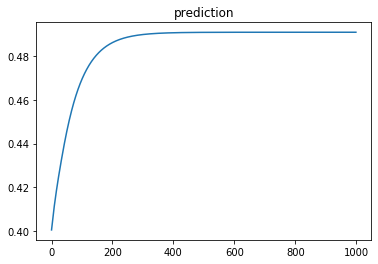

900 	MSE 3.9163747e-06


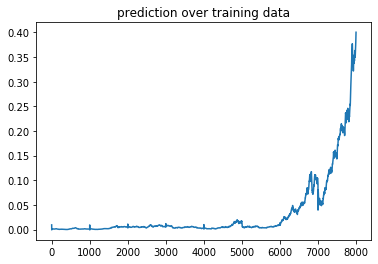

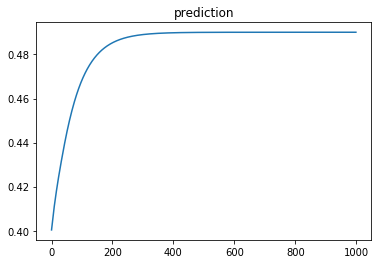

920 	MSE 3.90418e-06


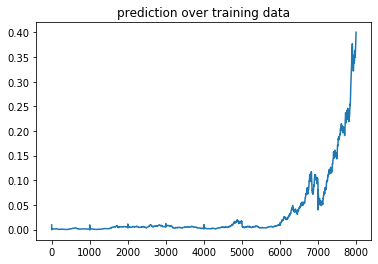

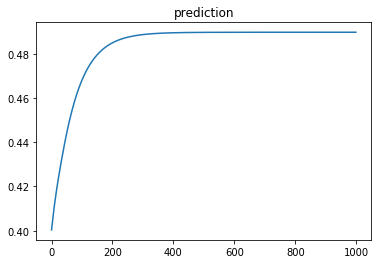

940 	MSE 3.8923563e-06


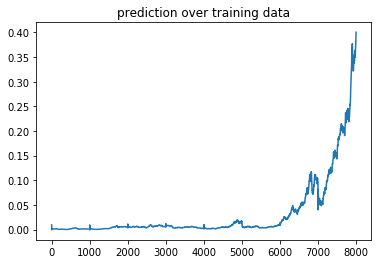

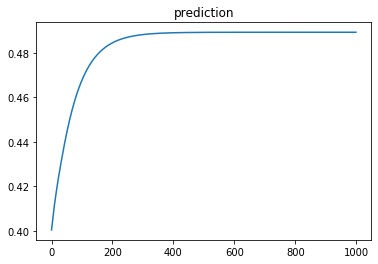

960 	MSE 3.880528e-06


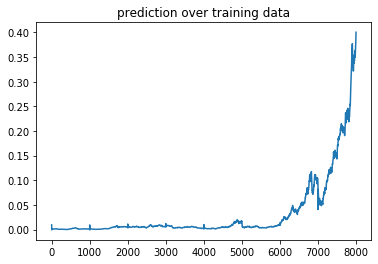

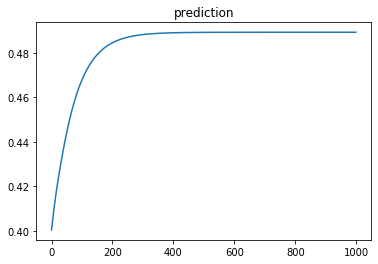

980 	MSE 3.8687494e-06


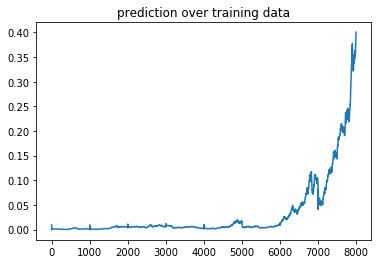

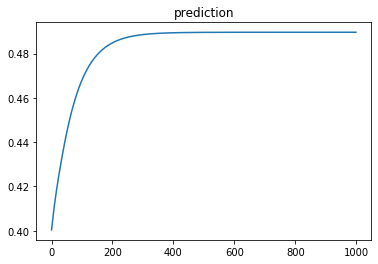

1000 	MSE 3.858115e-06


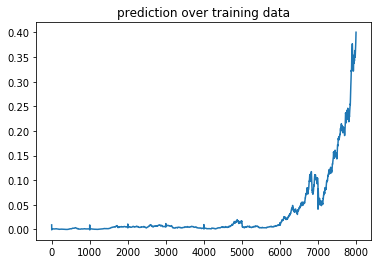

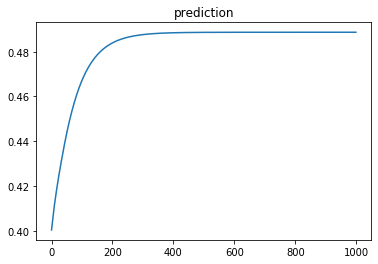

1020 	MSE 3.845596e-06


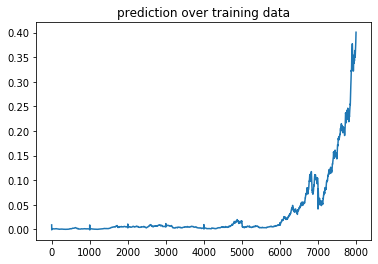

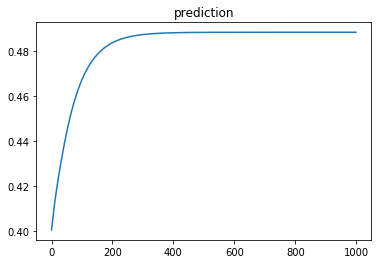

1040 	MSE 3.8362964e-06


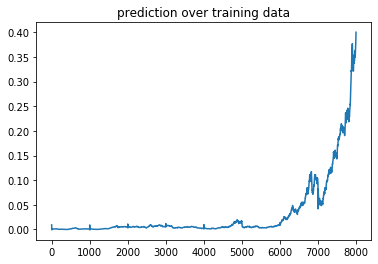

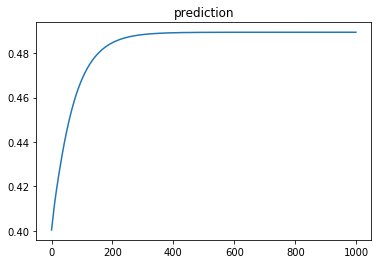

1060 	MSE 3.824268e-06


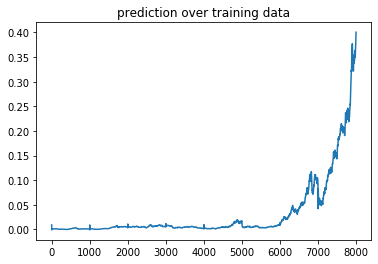

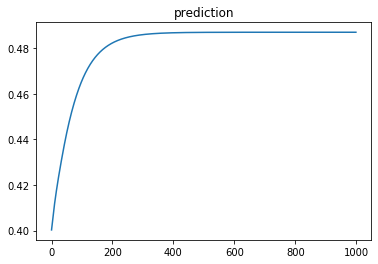

1080 	MSE 3.8116375e-06


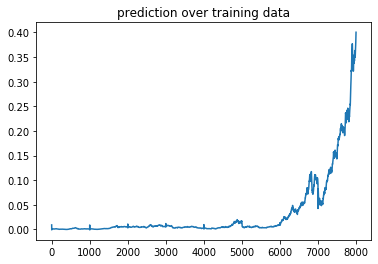

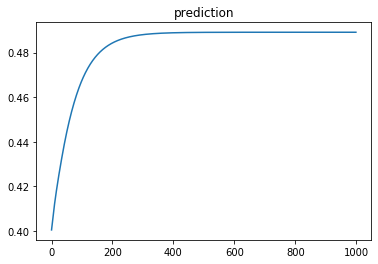

1100 	MSE 3.8001376e-06


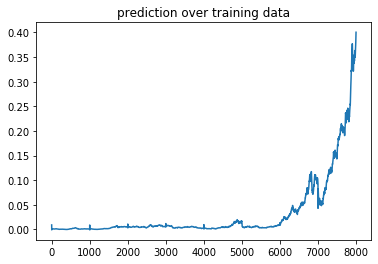

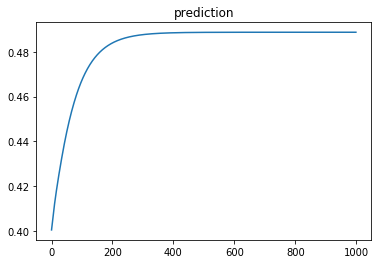

1120 	MSE 3.7894076e-06


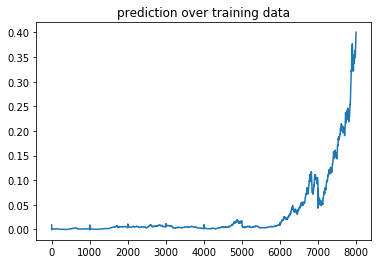

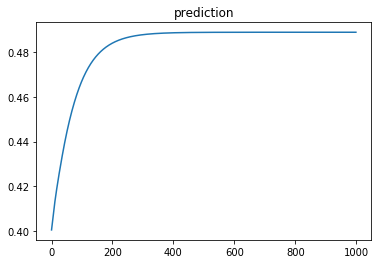

1140 	MSE 3.7787681e-06


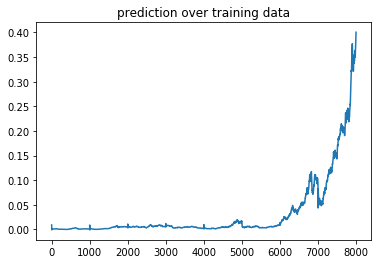

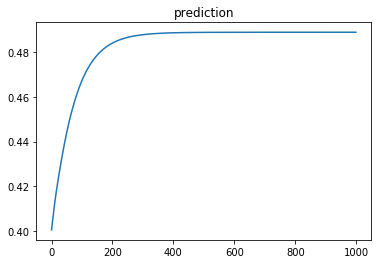

1160 	MSE 3.7734433e-06


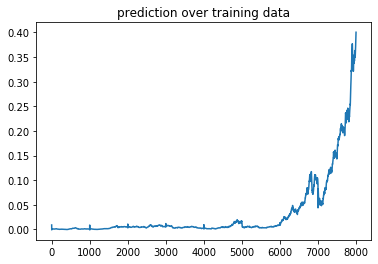

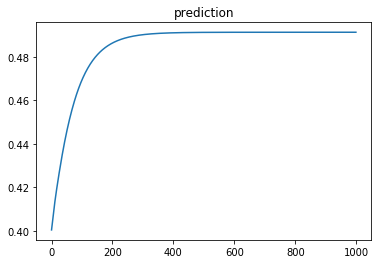

1180 	MSE 3.850495e-06


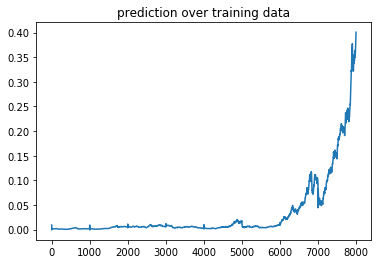

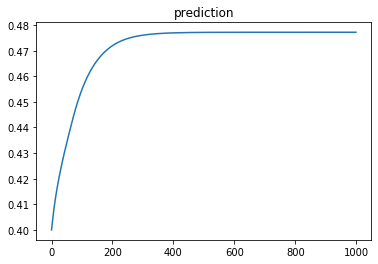

1200 	MSE 3.7574255e-06


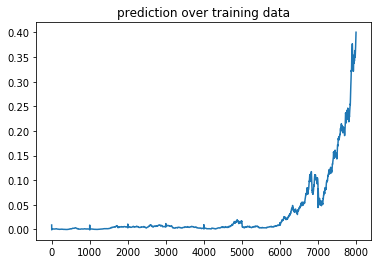

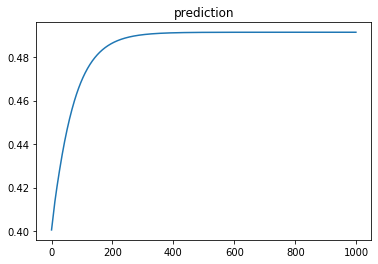

1220 	MSE 3.7371303e-06


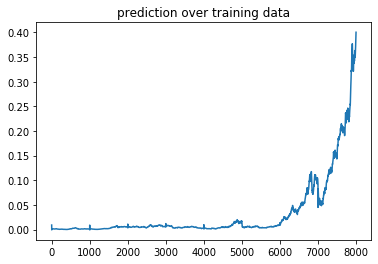

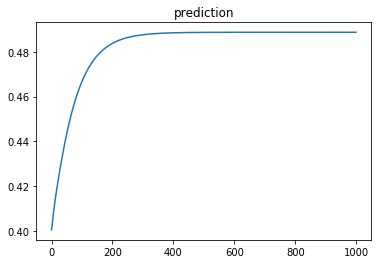

1240 	MSE 3.7267528e-06


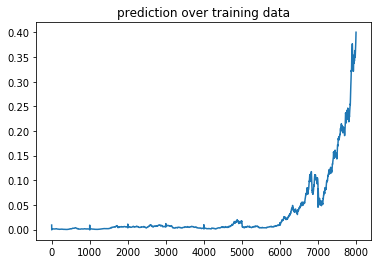

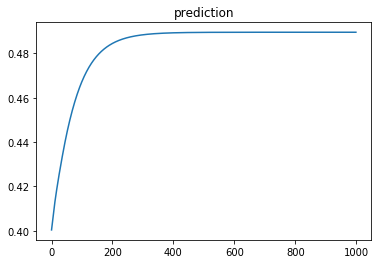

1260 	MSE 3.716107e-06


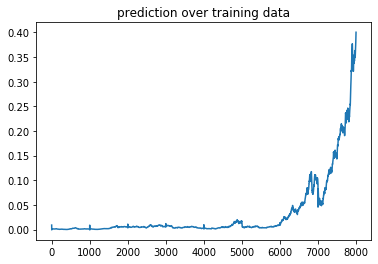

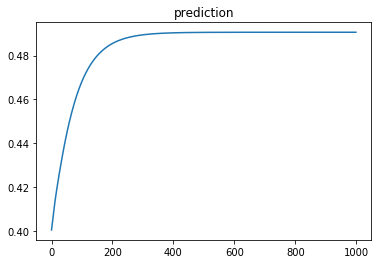

1280 	MSE 3.7059158e-06


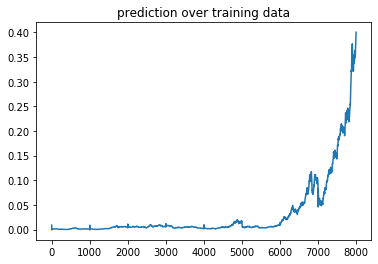

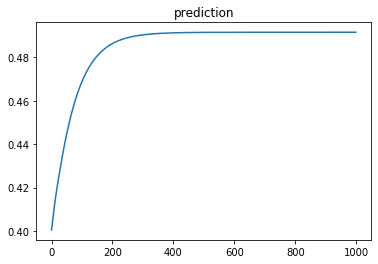

1300 	MSE 3.6965096e-06


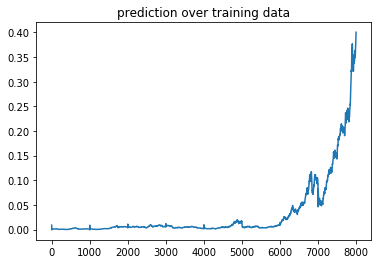

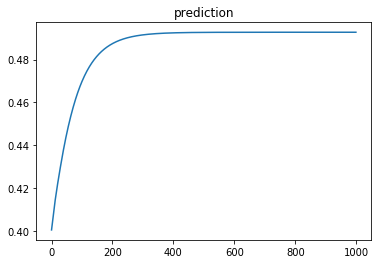

1320 	MSE 3.846732e-06


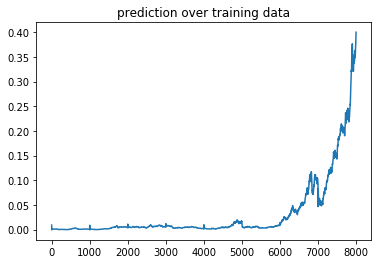

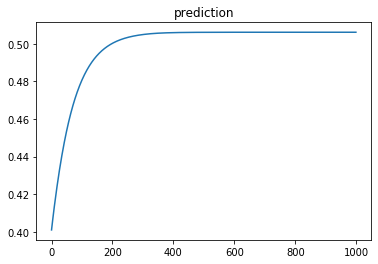

1340 	MSE 3.697076e-06


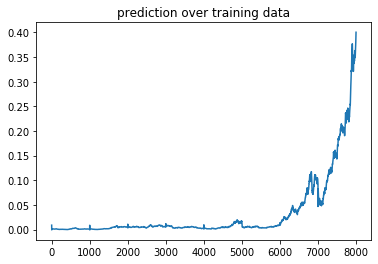

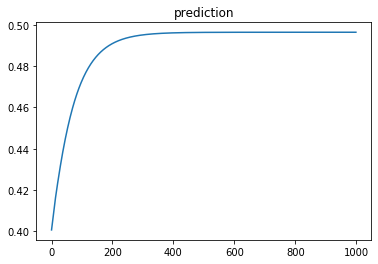

1360 	MSE 3.6688418e-06


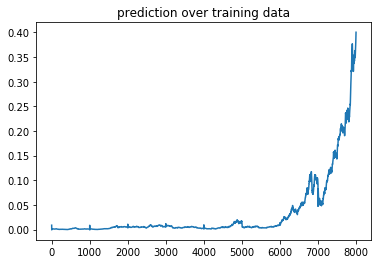

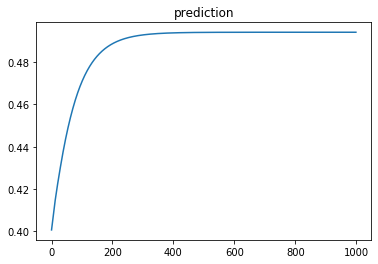

1380 	MSE 3.6564213e-06


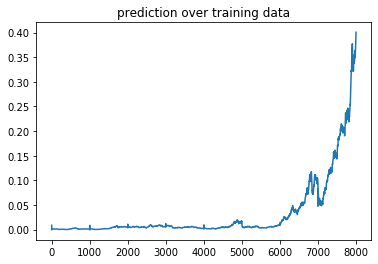

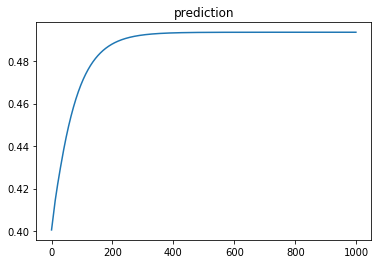

1400 	MSE 3.6464107e-06


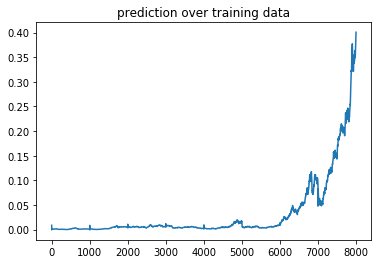

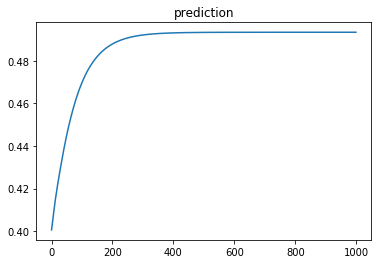

1420 	MSE 3.6388853e-06


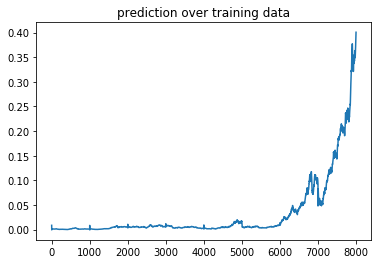

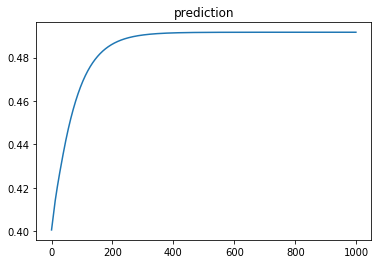

1440 	MSE 3.6271724e-06


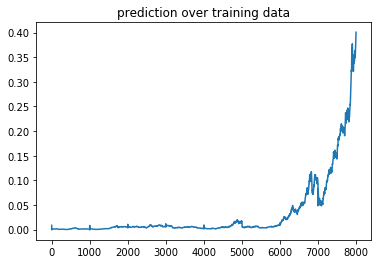

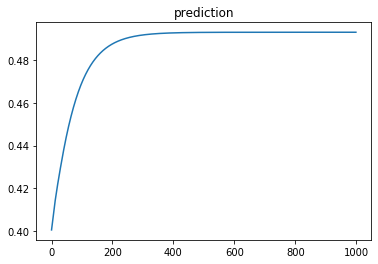

1460 	MSE 3.6269537e-06


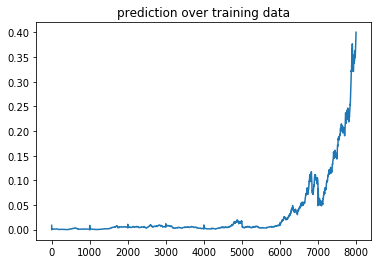

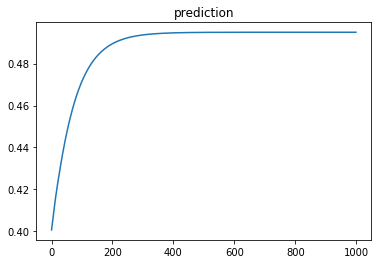

1480 	MSE 3.6091171e-06


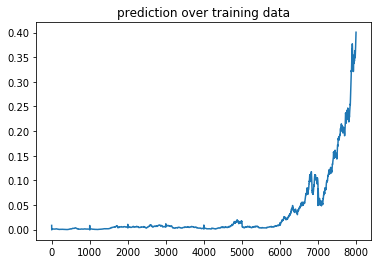

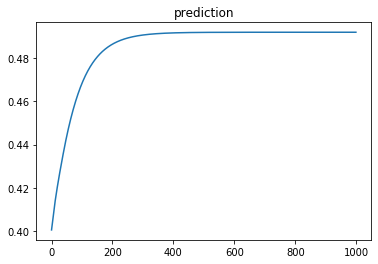

1500 	MSE 3.5982885e-06


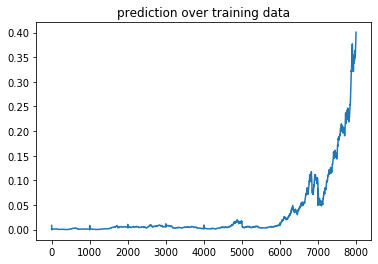

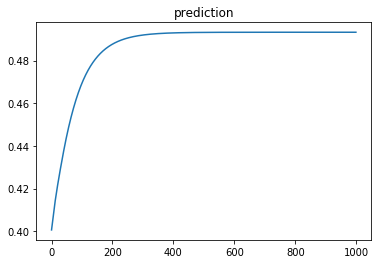

1520 	MSE 3.5883602e-06


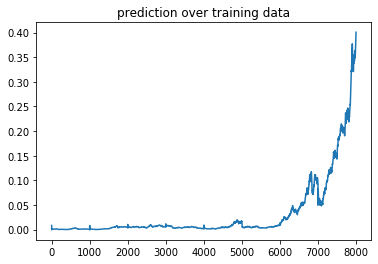

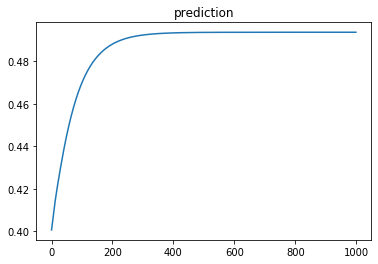

1540 	MSE 3.578789e-06


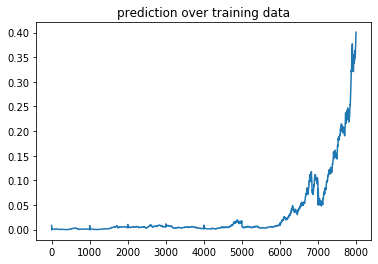

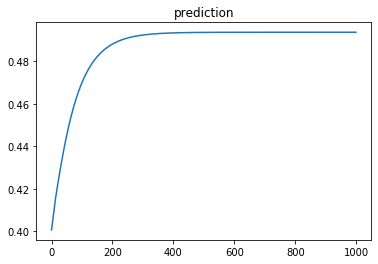

1560 	MSE 3.5698017e-06


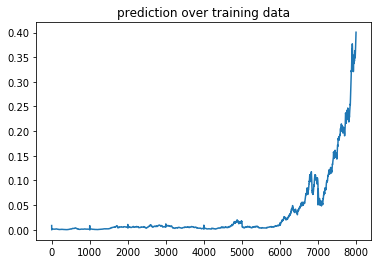

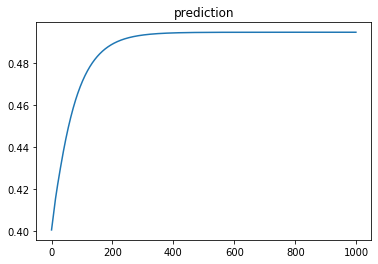

1580 	MSE 3.789824e-06


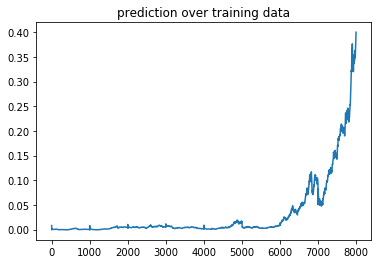

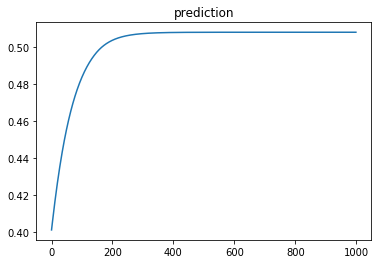

1600 	MSE 3.5525795e-06


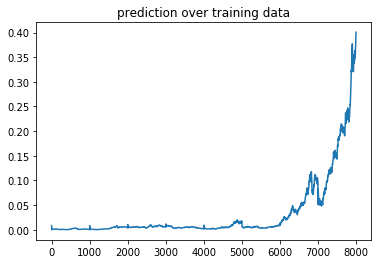

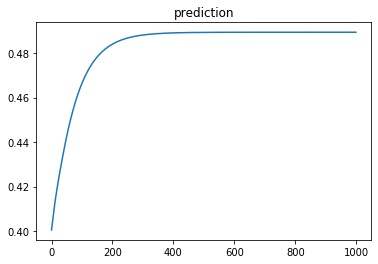

1620 	MSE 3.5426328e-06


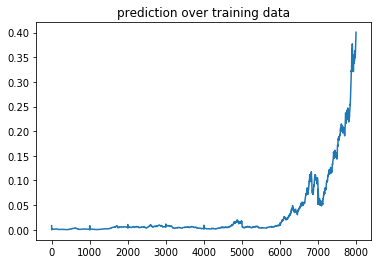

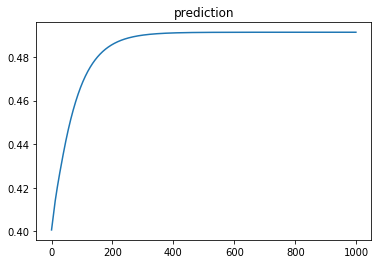

1640 	MSE 3.5309597e-06


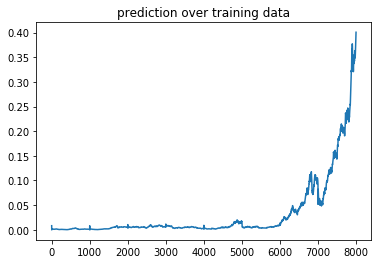

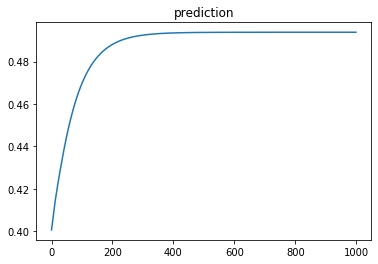

1660 	MSE 3.5216603e-06


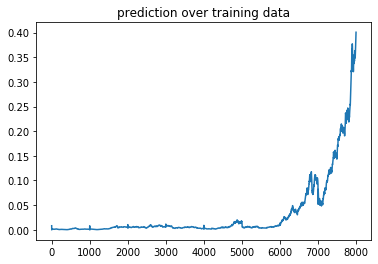

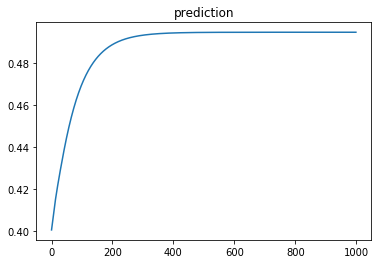

1680 	MSE 3.51218e-06


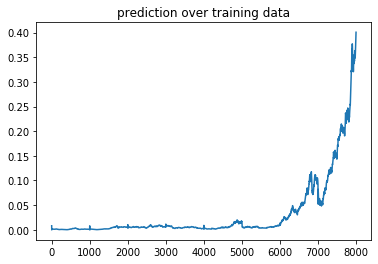

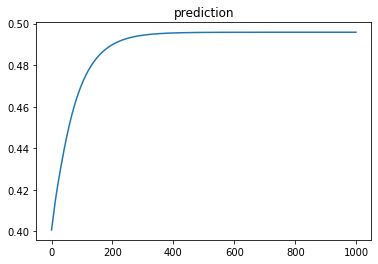

1700 	MSE 3.5035982e-06


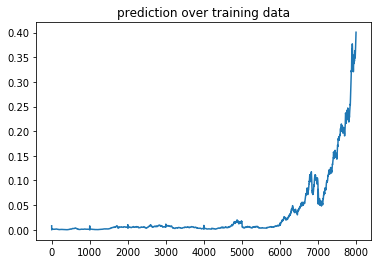

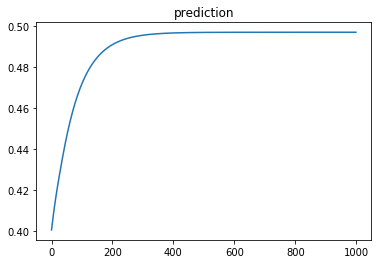

1720 	MSE 3.7083487e-06


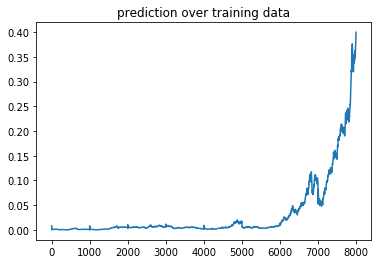

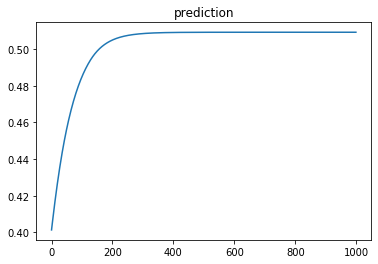

1740 	MSE 3.4971306e-06


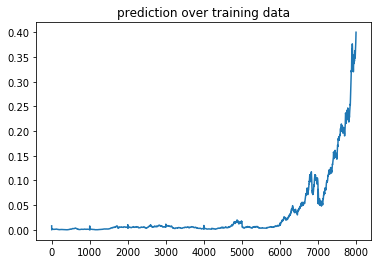

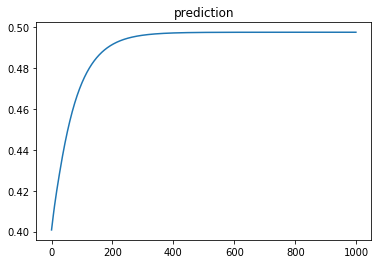

1760 	MSE 3.4722402e-06


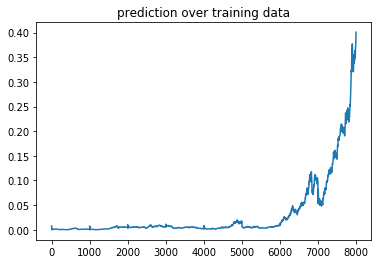

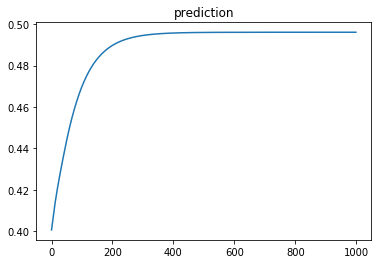

1780 	MSE 3.4622187e-06


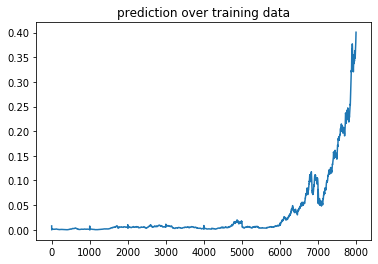

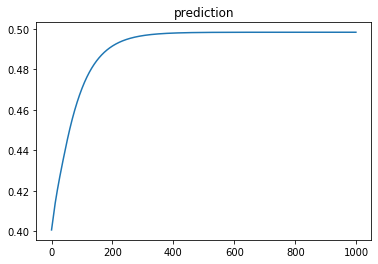

1800 	MSE 3.452633e-06


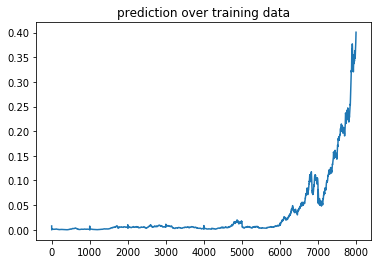

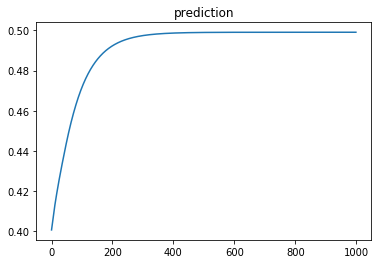

1820 	MSE 3.4427276e-06


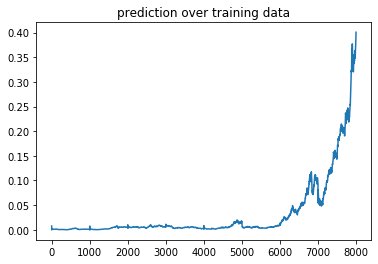

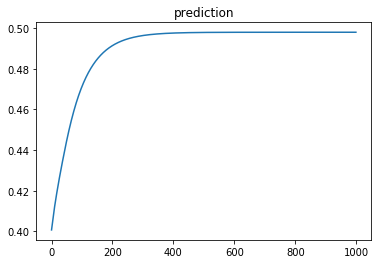

1840 	MSE 3.440657e-06


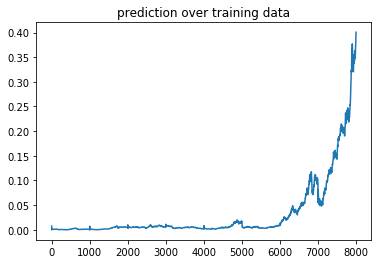

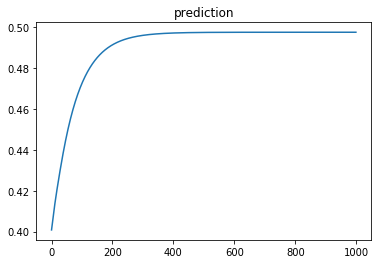

1860 	MSE 3.524513e-06


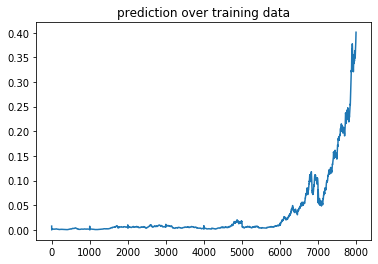

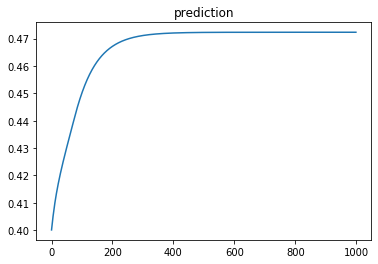

1880 	MSE 3.403069e-06


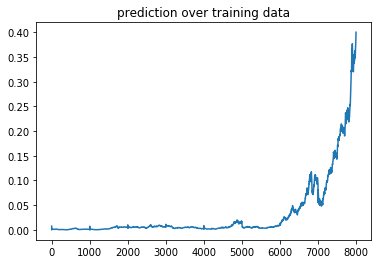

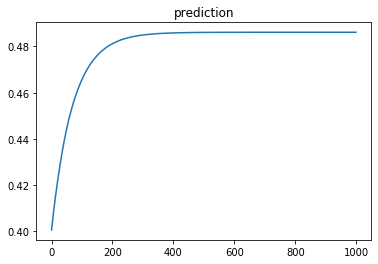

1900 	MSE 3.3780673e-06


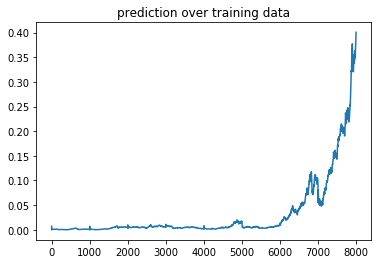

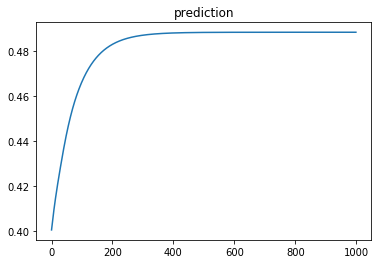

1920 	MSE 3.3678705e-06


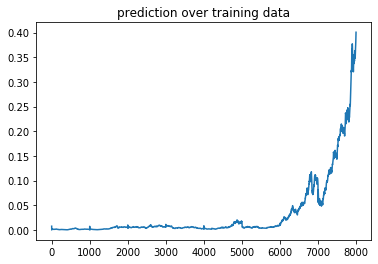

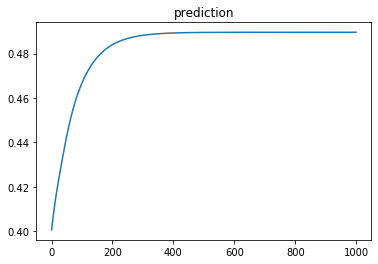

1940 	MSE 3.3581885e-06


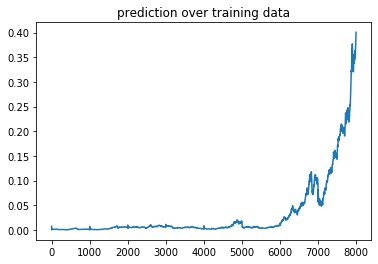

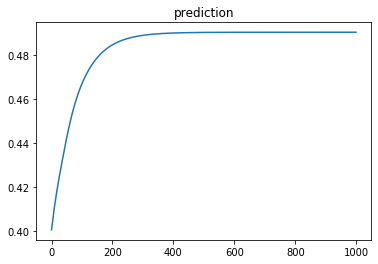

1960 	MSE 3.3485046e-06


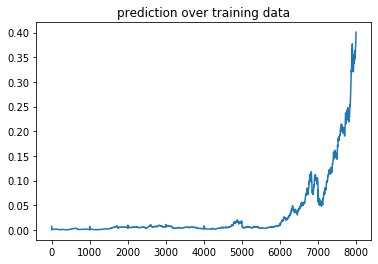

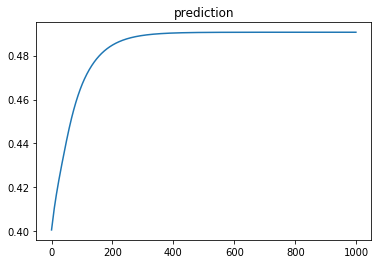

1980 	MSE 3.3389535e-06


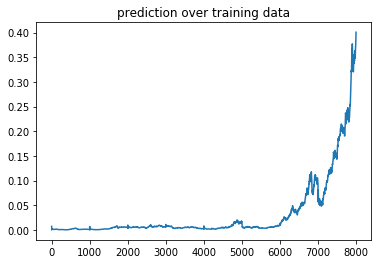

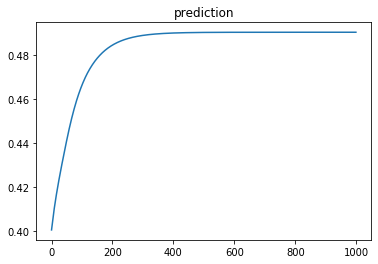

2000 	MSE 3.3423735e-06


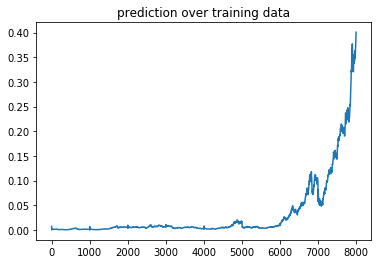

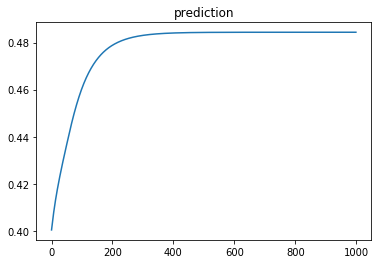

2020 	MSE 3.359902e-06


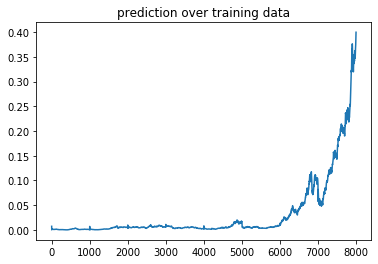

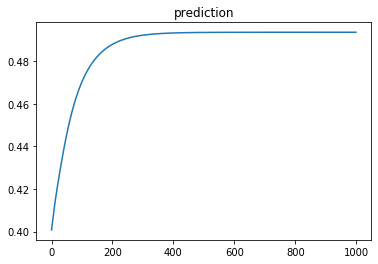

2040 	MSE 3.3105919e-06


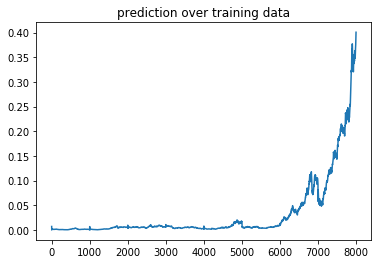

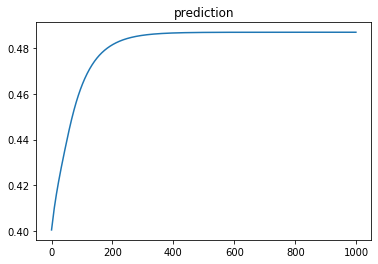

2060 	MSE 3.301626e-06


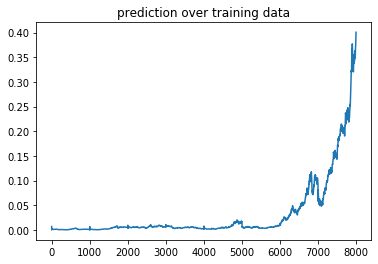

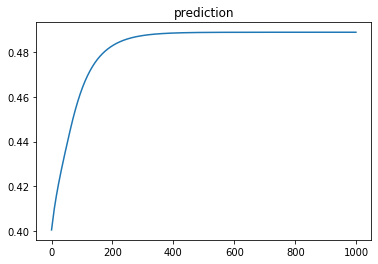

2080 	MSE 3.292535e-06


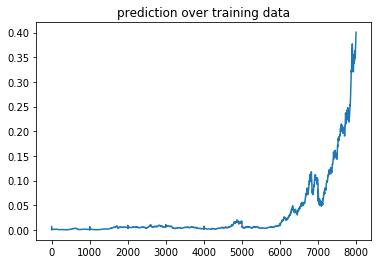

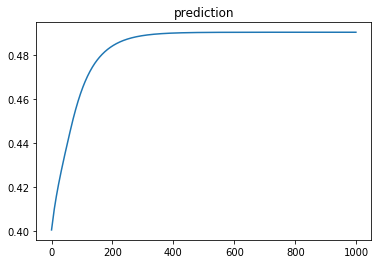

2100 	MSE 3.2837092e-06


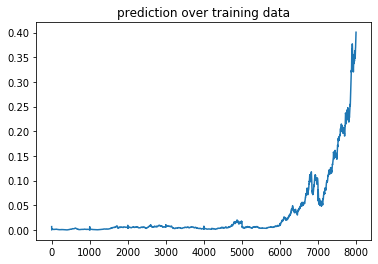

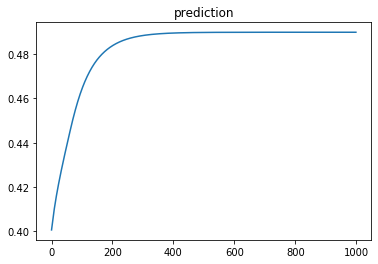

2120 	MSE 3.2747487e-06


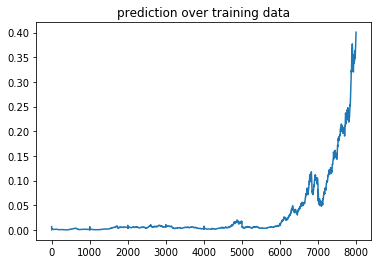

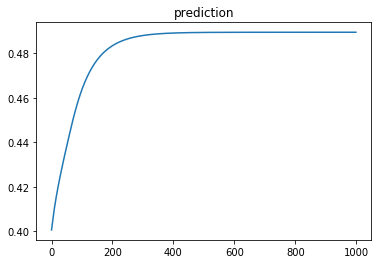

2140 	MSE 3.2661505e-06


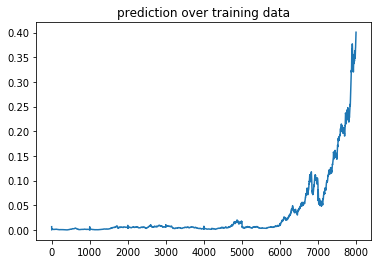

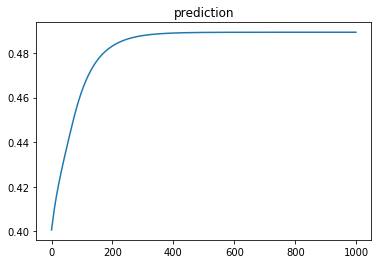

2160 	MSE 3.2576545e-06


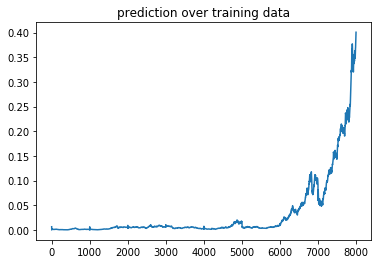

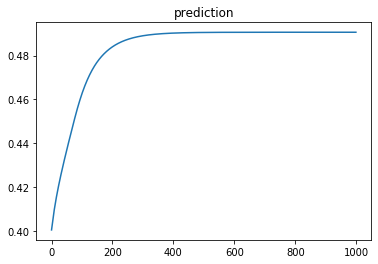

2180 	MSE 3.2502758e-06


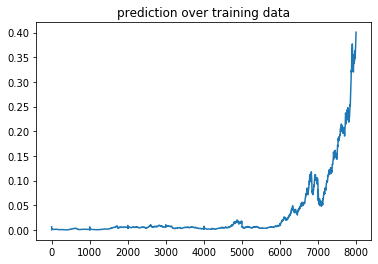

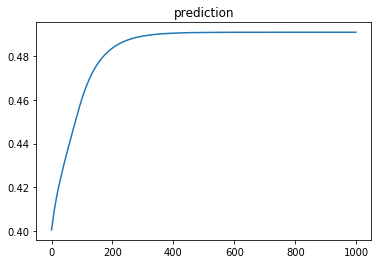

2200 	MSE 3.382052e-06


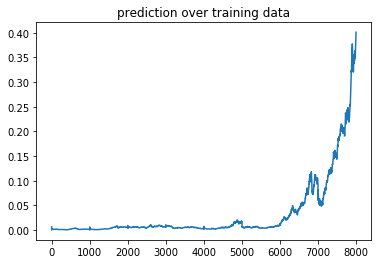

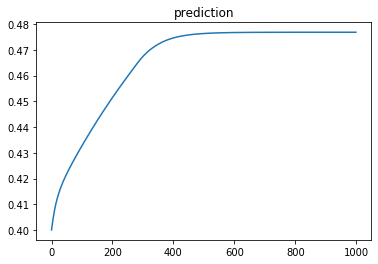

2220 	MSE 3.2405842e-06


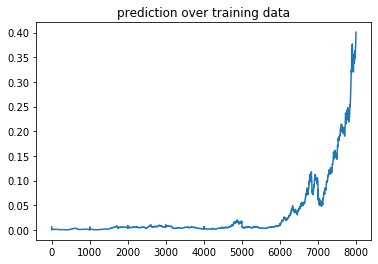

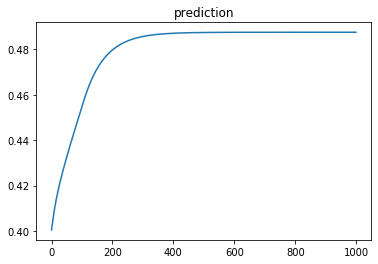

2240 	MSE 3.2250284e-06


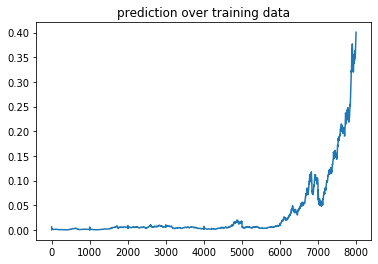

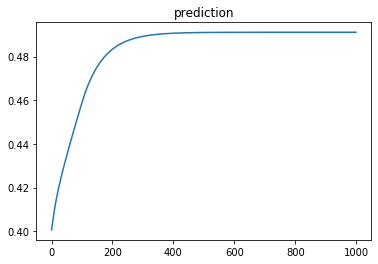

2260 	MSE 3.215414e-06


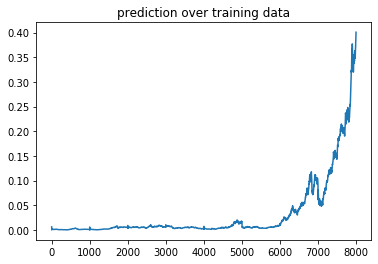

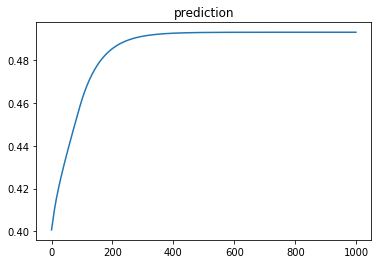

2280 	MSE 3.2068854e-06


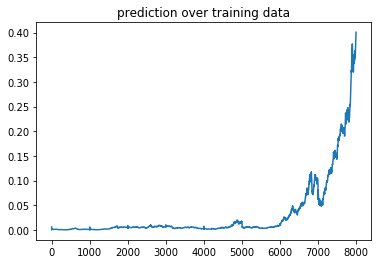

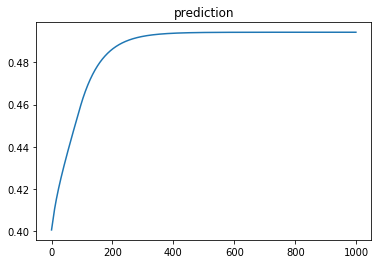

2300 	MSE 3.1982026e-06


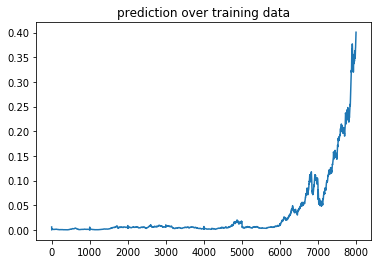

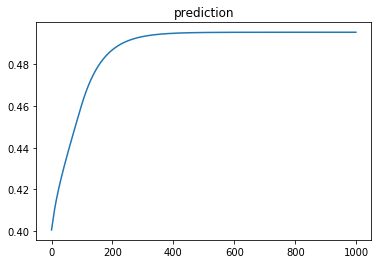

2320 	MSE 3.1898069e-06


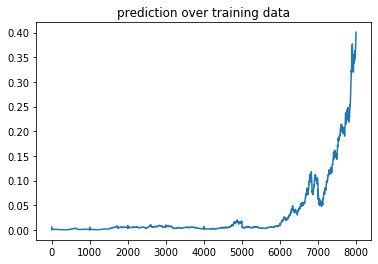

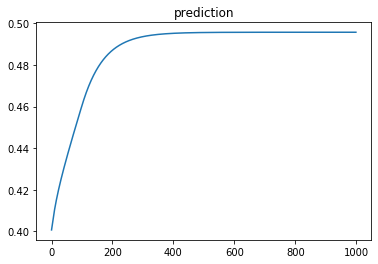

2340 	MSE 3.181564e-06


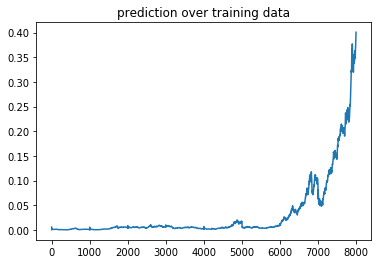

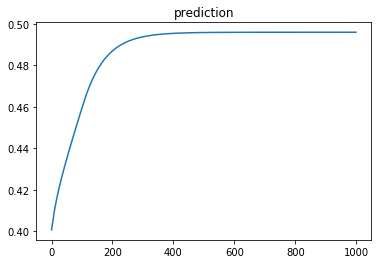

2360 	MSE 3.173339e-06


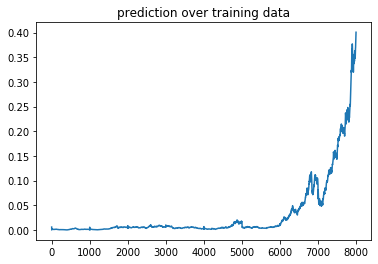

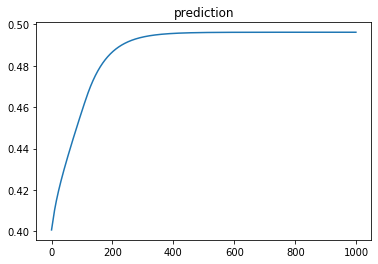

2380 	MSE 3.1651416e-06


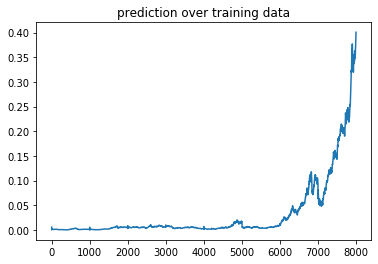

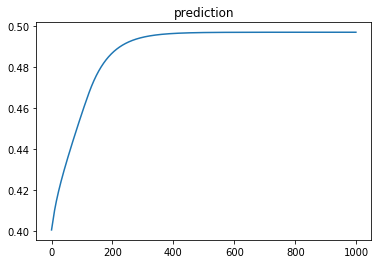

2400 	MSE 3.1585216e-06


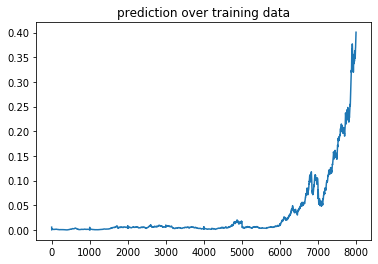

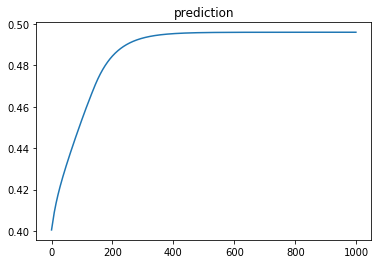

2420 	MSE 3.169453e-06


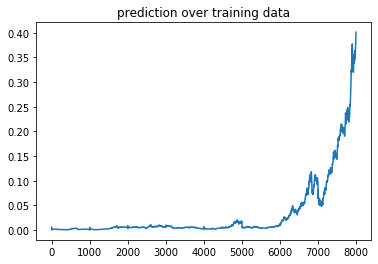

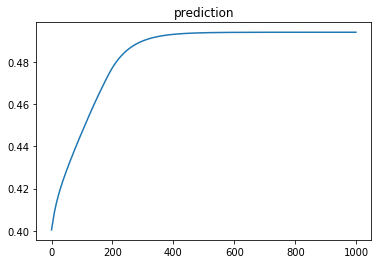

2440 	MSE 3.147808e-06


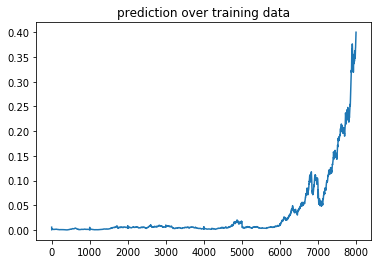

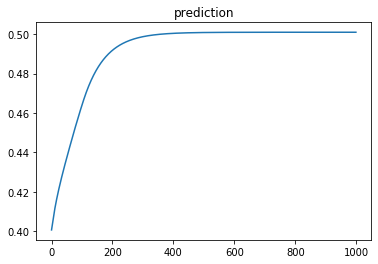

2460 	MSE 3.1331126e-06


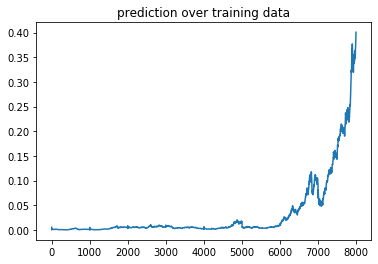

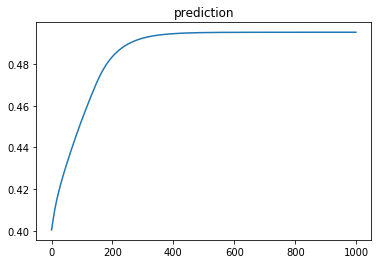

2480 	MSE 3.125175e-06


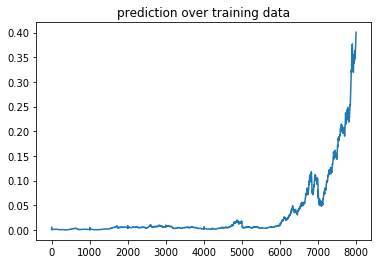

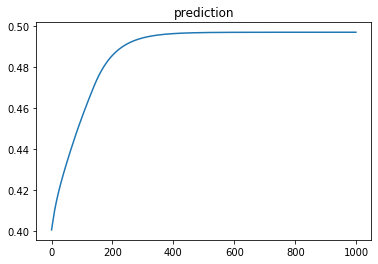

2500 	MSE 3.1170416e-06


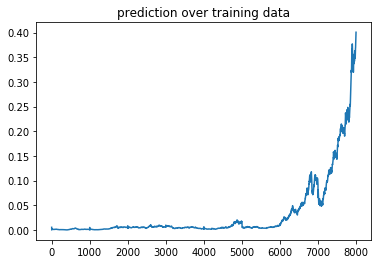

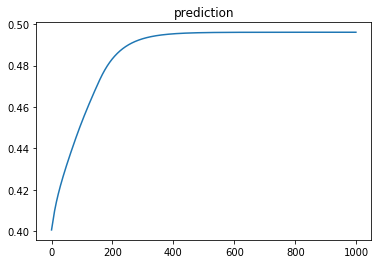

2520 	MSE 3.109583e-06


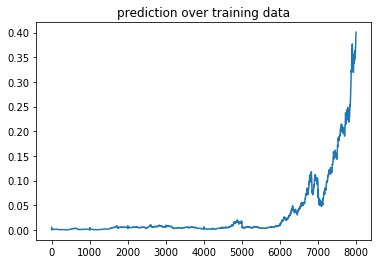

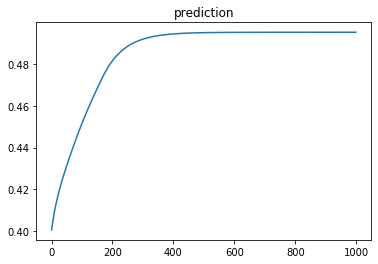

2540 	MSE 3.3152526e-06


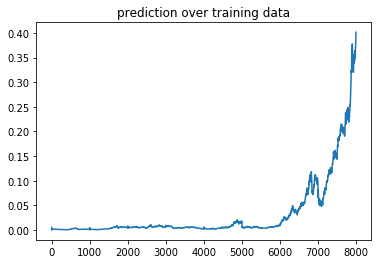

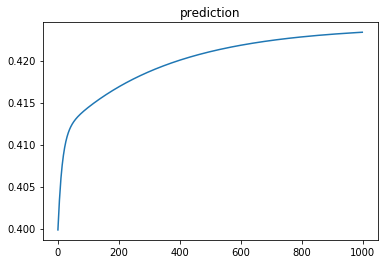

2560 	MSE 3.0946985e-06


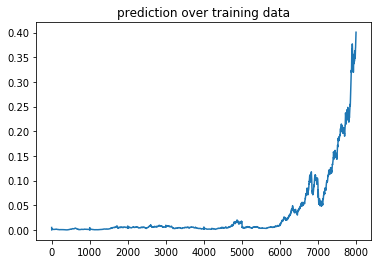

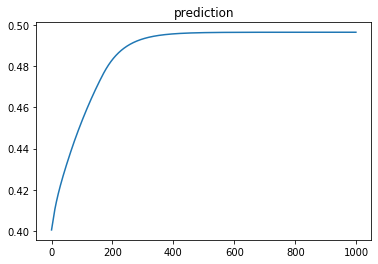

2580 	MSE 3.0864057e-06


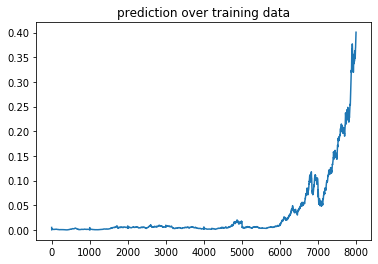

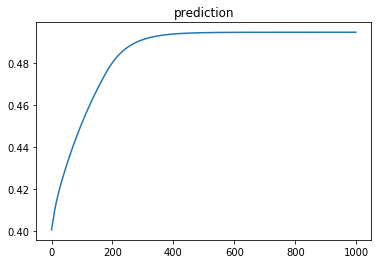

2600 	MSE 3.0784063e-06


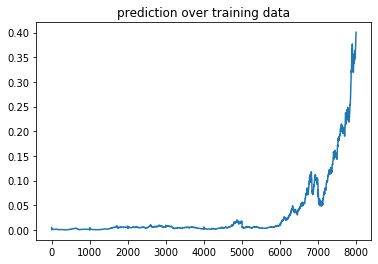

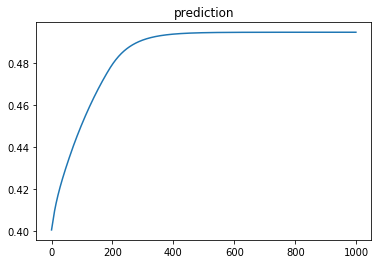

2620 	MSE 3.0706506e-06


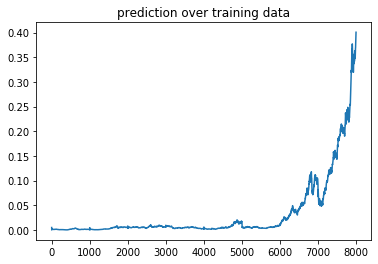

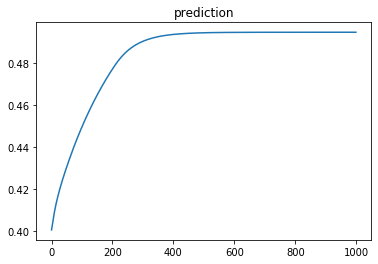

2640 	MSE 3.0630342e-06


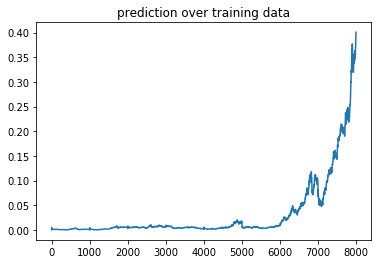

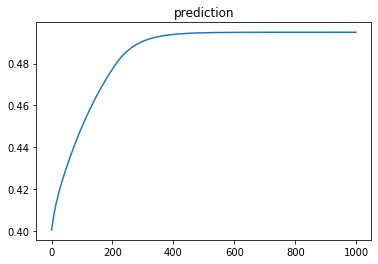

2660 	MSE 3.1138054e-06


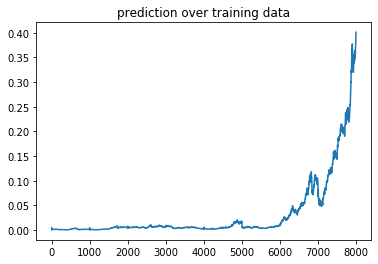

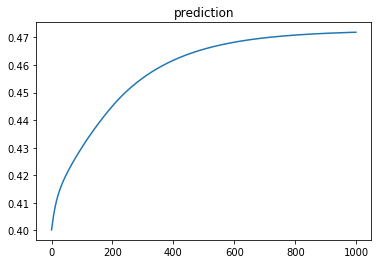

2680 	MSE 3.0992205e-06


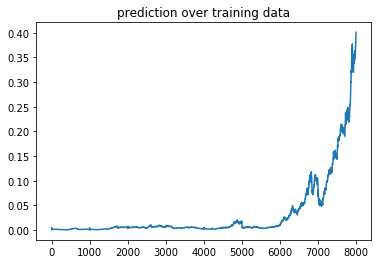

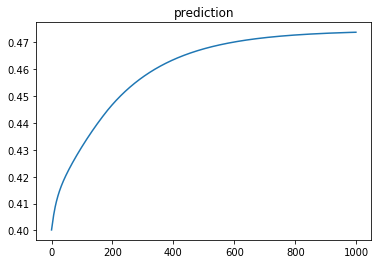

2700 	MSE 3.0447757e-06


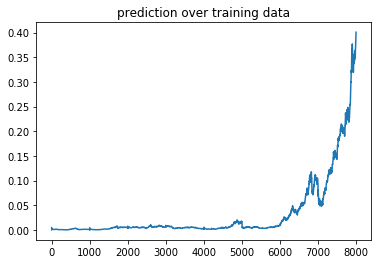

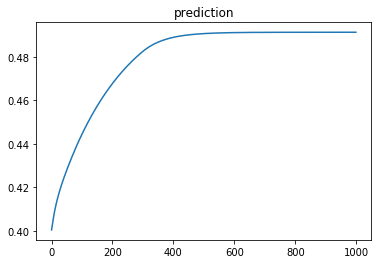

2720 	MSE 3.0349486e-06


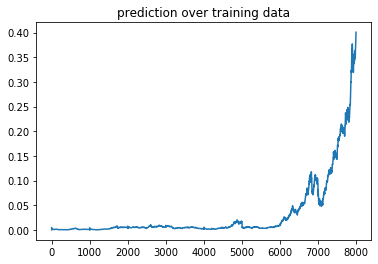

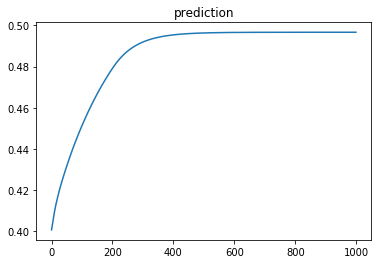

2740 	MSE 3.0268232e-06


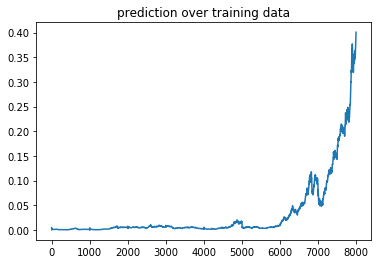

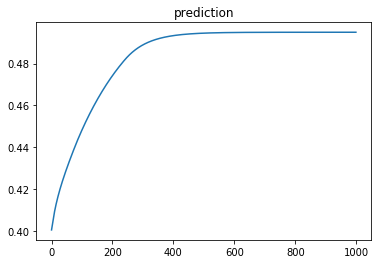

2760 	MSE 3.019494e-06


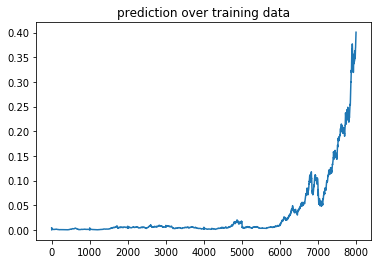

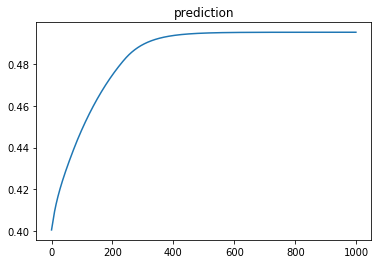

2780 	MSE 3.0122744e-06


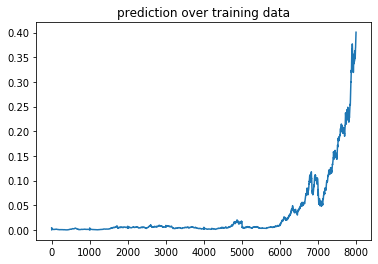

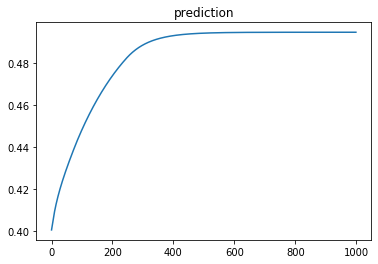

2800 	MSE 3.005098e-06


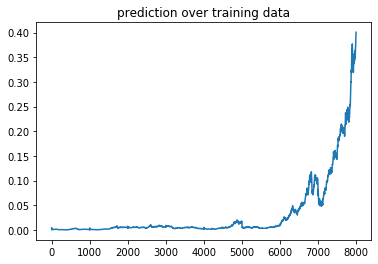

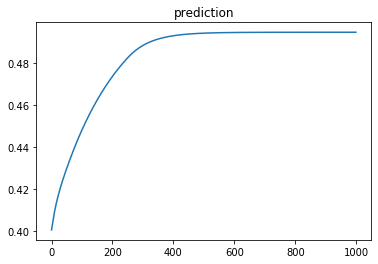

2820 	MSE 2.9979524e-06


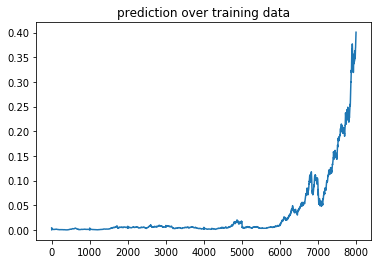

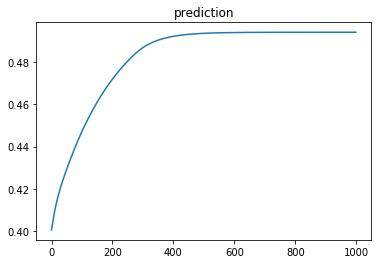

2840 	MSE 2.9907833e-06


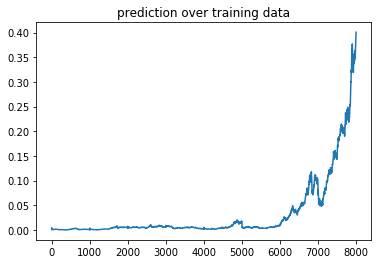

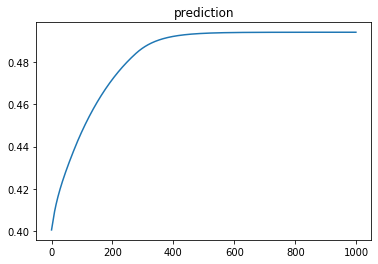

2860 	MSE 2.9845824e-06


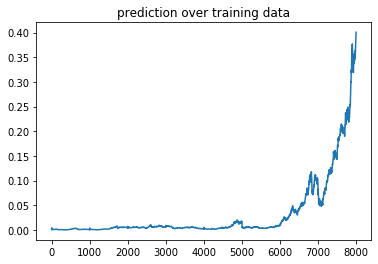

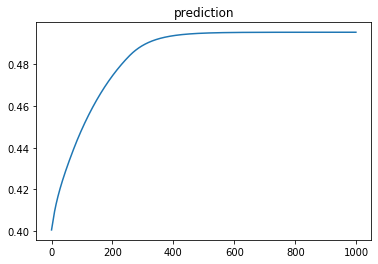

2880 	MSE 3.189592e-06


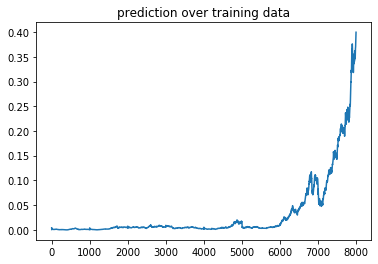

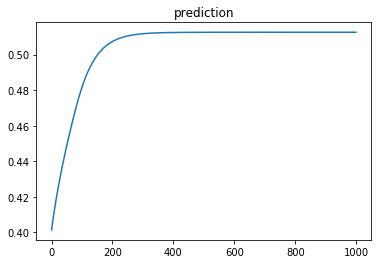

2900 	MSE 2.9937194e-06


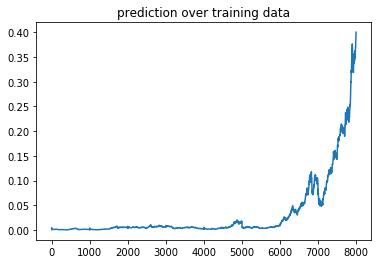

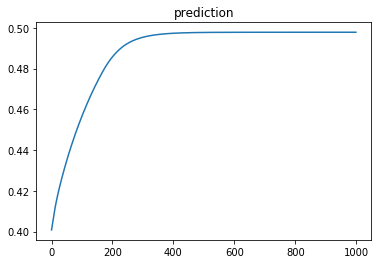

2920 	MSE 2.9646567e-06


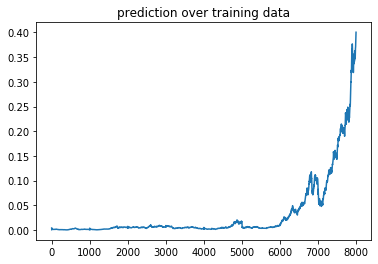

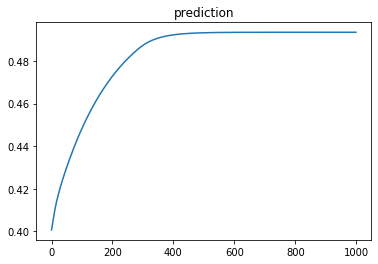

2940 	MSE 2.9560233e-06


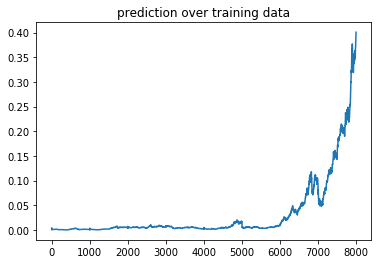

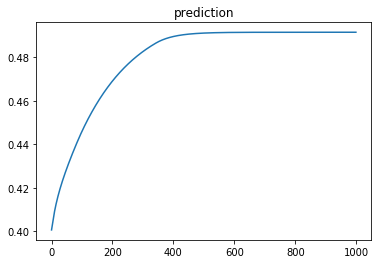

2960 	MSE 2.9488383e-06


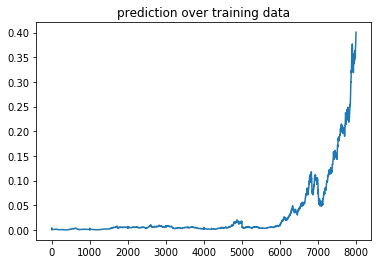

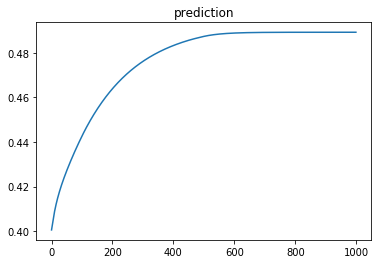

2980 	MSE 2.9440928e-06


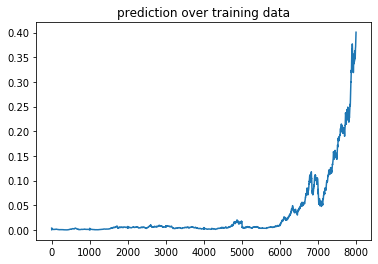

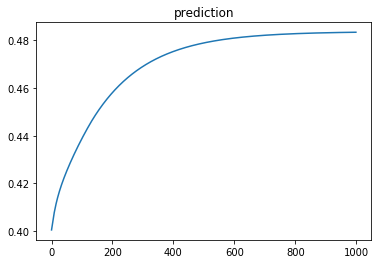

3000 	MSE 3.0770416e-06


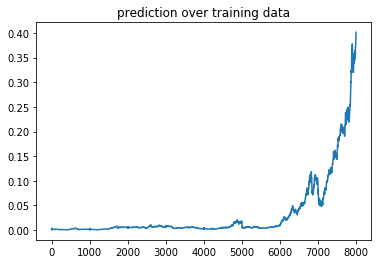

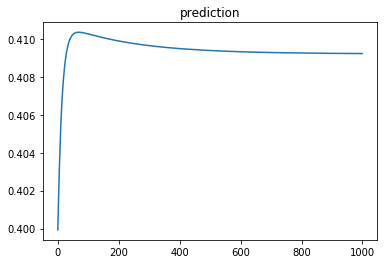

3020 	MSE 2.931924e-06


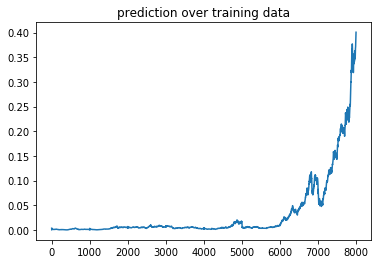

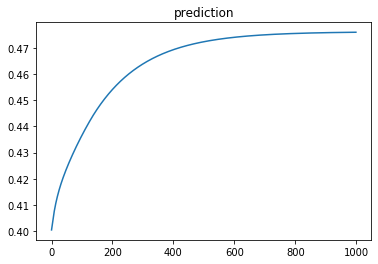

3040 	MSE 2.922229e-06


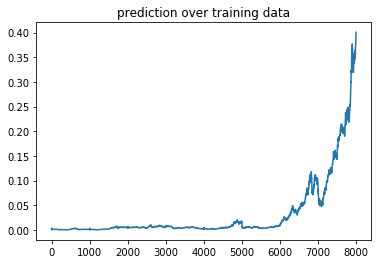

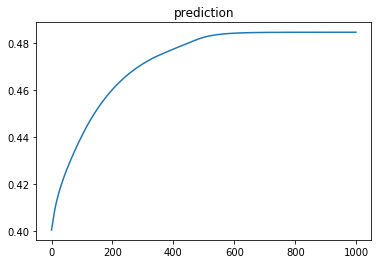

3060 	MSE 2.916194e-06


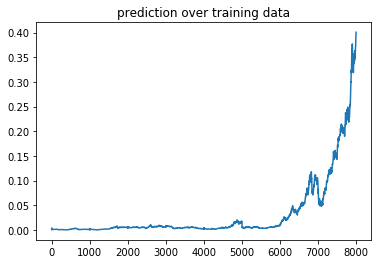

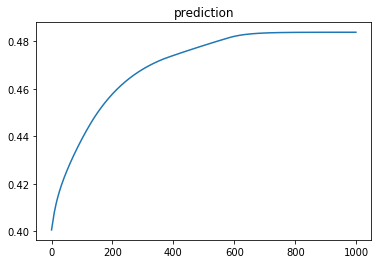

3080 	MSE 2.9097678e-06


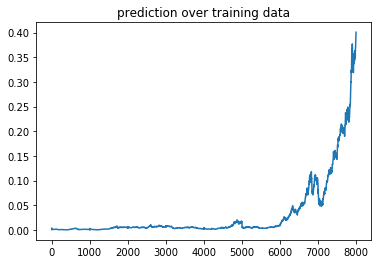

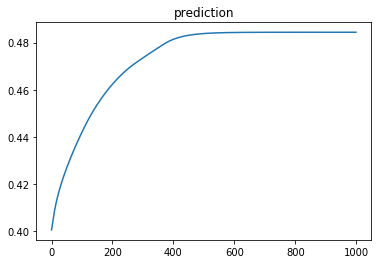

3100 	MSE 2.9107036e-06


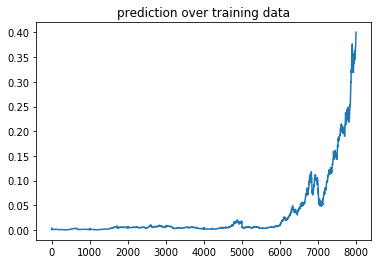

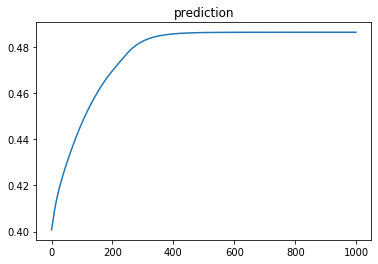

3120 	MSE 2.9151247e-06


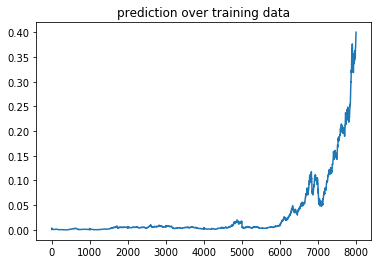

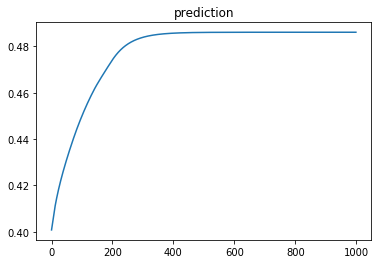

3140 	MSE 2.8985519e-06


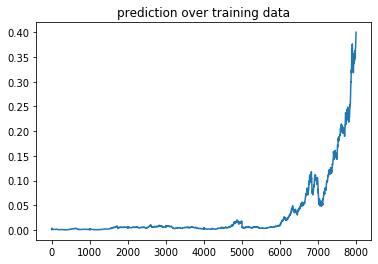

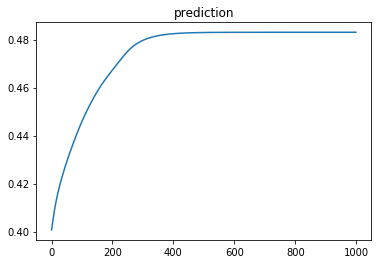

3160 	MSE 2.884935e-06


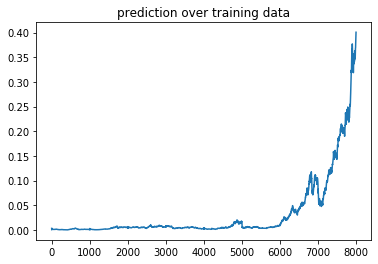

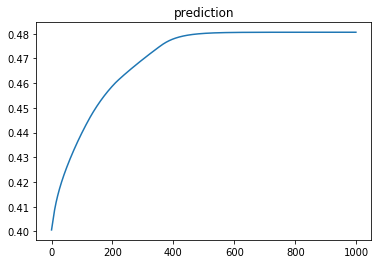

3180 	MSE 2.8784002e-06


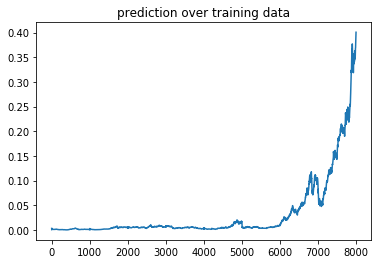

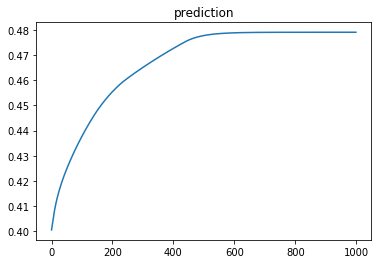

3200 	MSE 2.872585e-06


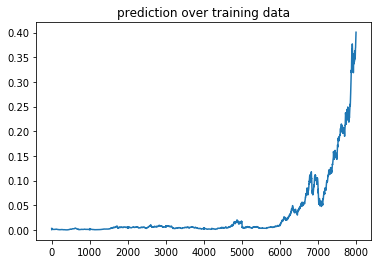

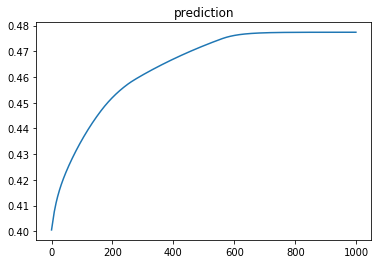

3220 	MSE 3.2944279e-06


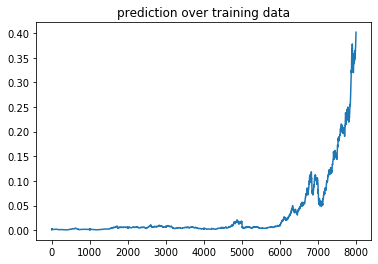

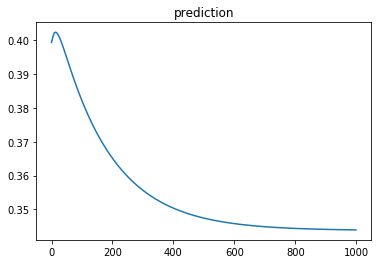

3240 	MSE 2.893962e-06


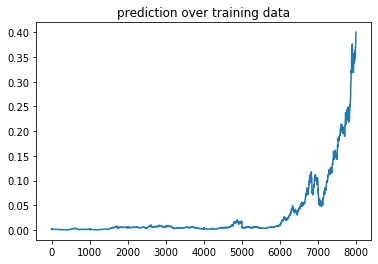

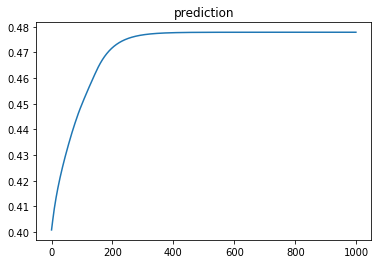

3260 	MSE 2.860321e-06


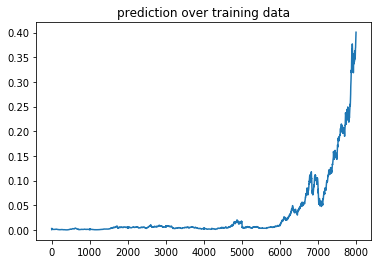

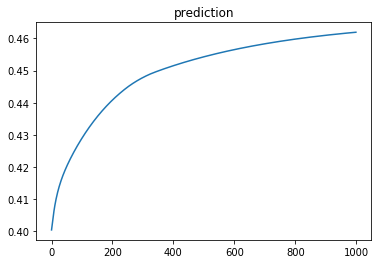

3280 	MSE 2.8494e-06


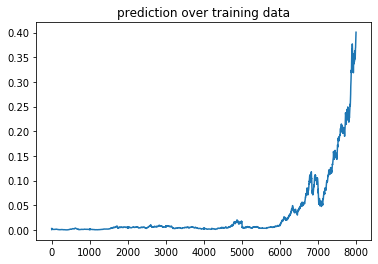

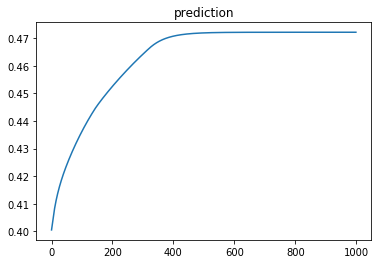

3300 	MSE 2.8435488e-06


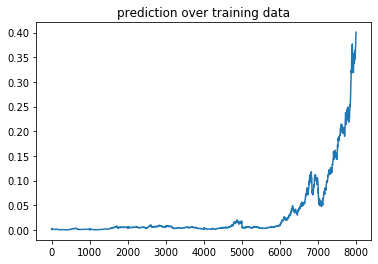

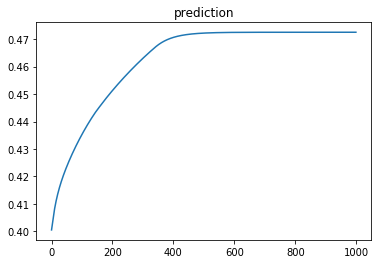

3320 	MSE 2.8378386e-06


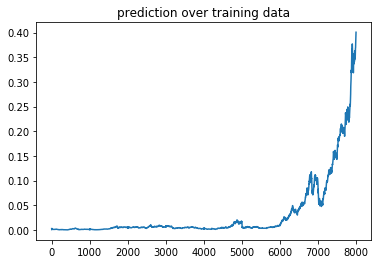

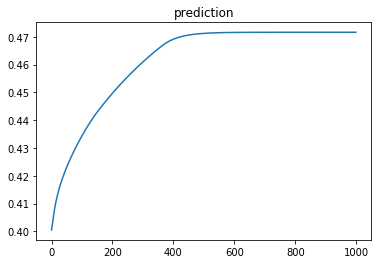

3340 	MSE 2.832284e-06


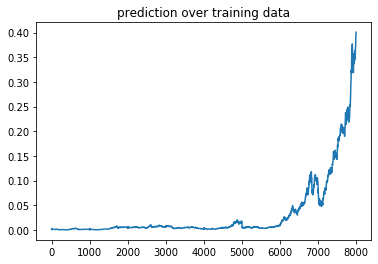

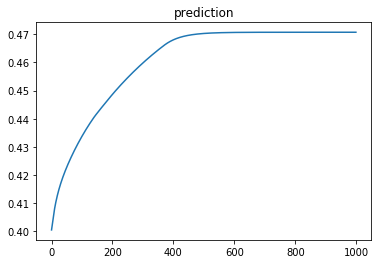

3360 	MSE 2.826774e-06


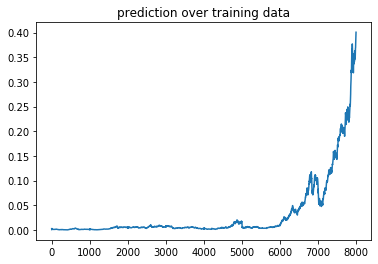

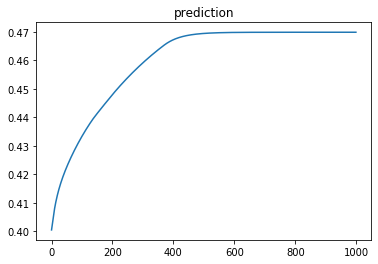

3380 	MSE 2.8231411e-06


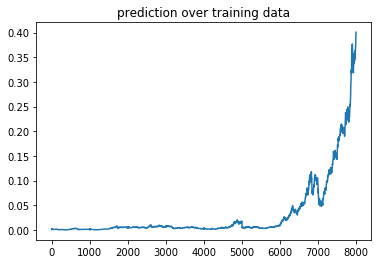

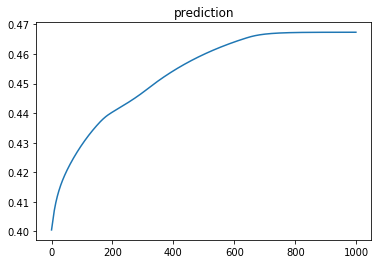

3400 	MSE 2.9253802e-06


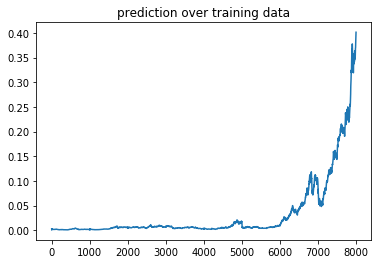

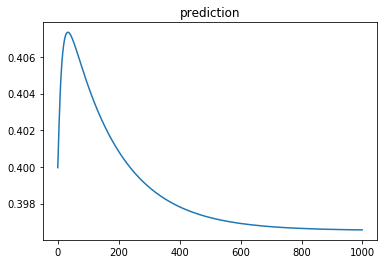

3420 	MSE 2.8302386e-06


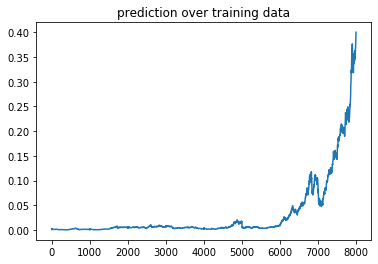

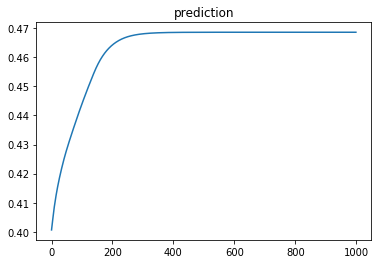

3440 	MSE 2.8059264e-06


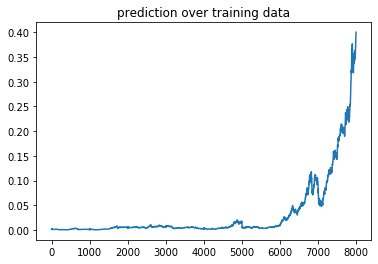

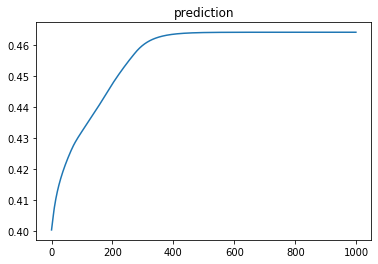

3460 	MSE 2.800262e-06


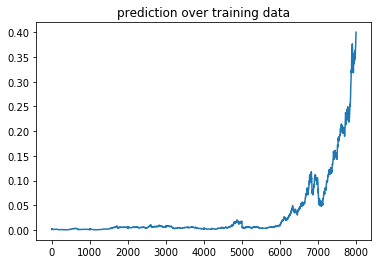

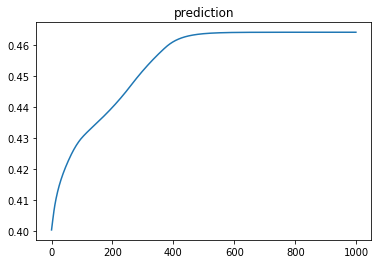

3480 	MSE 2.7951278e-06


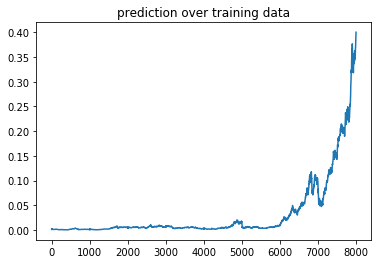

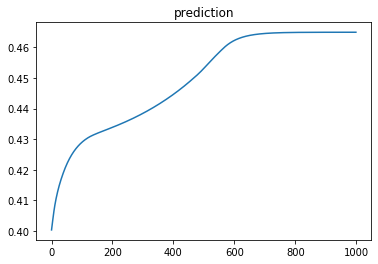

3500 	MSE 2.7894582e-06


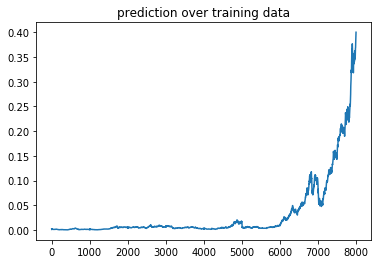

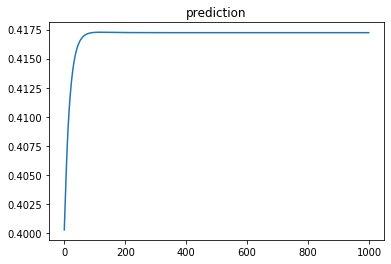

3520 	MSE 2.7868357e-06


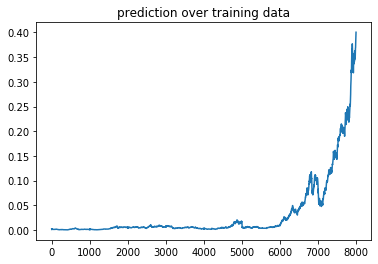

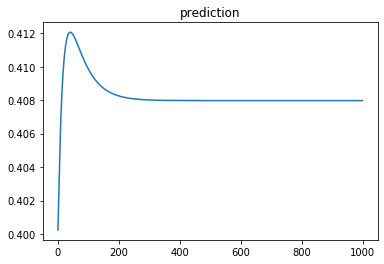

3540 	MSE 2.8186087e-06


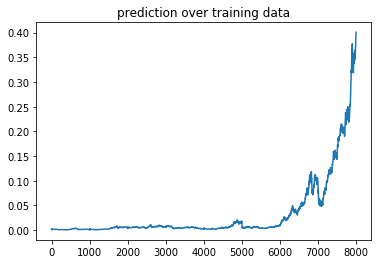

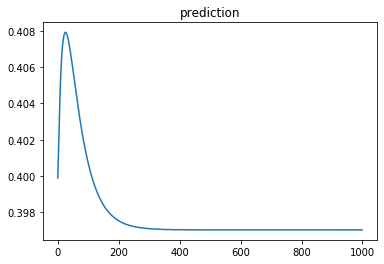

3560 	MSE 2.796595e-06


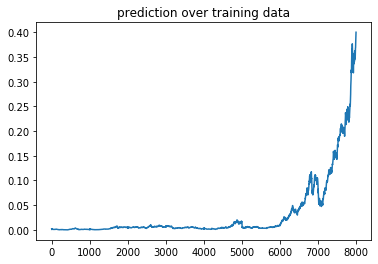

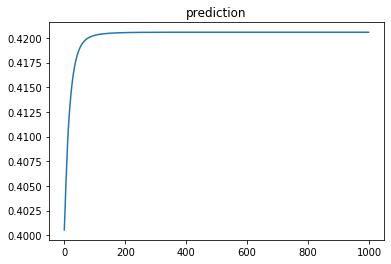

3580 	MSE 2.7694869e-06


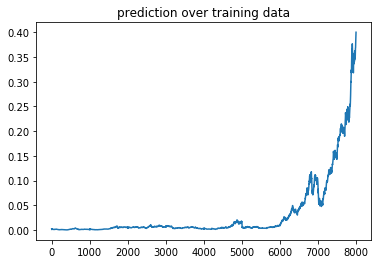

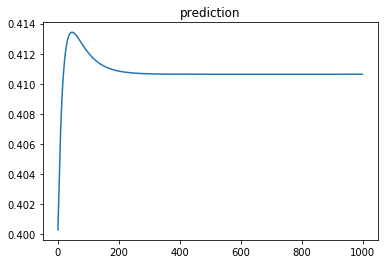

3600 	MSE 2.7643428e-06


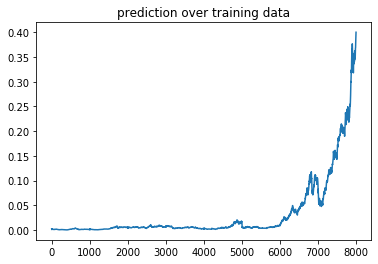

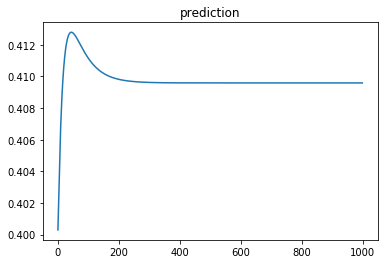

3620 	MSE 2.7596013e-06


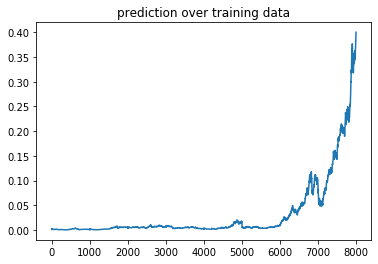

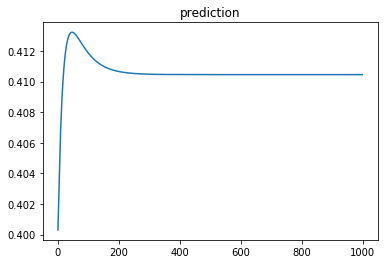

3640 	MSE 2.7546967e-06


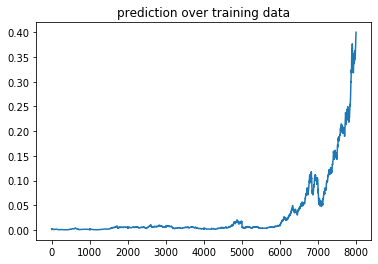

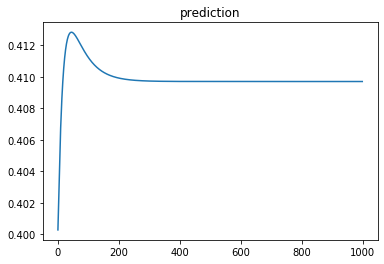

3660 	MSE 2.7509584e-06


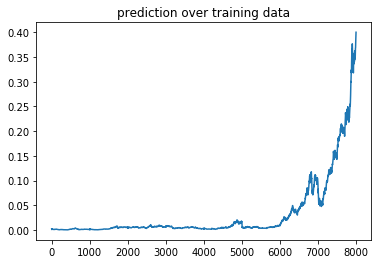

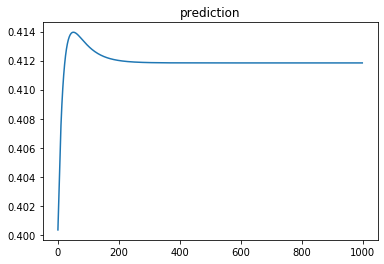

3680 	MSE 2.9027035e-06


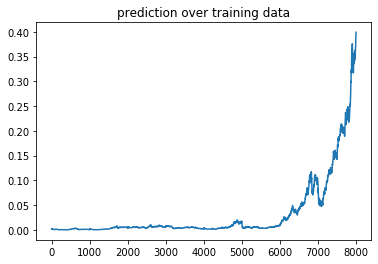

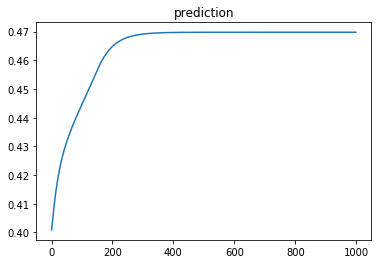

3700 	MSE 2.7704932e-06


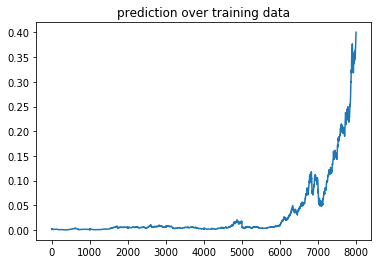

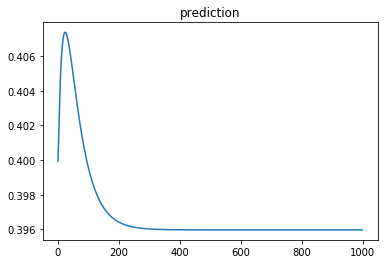

3720 	MSE 2.7391052e-06


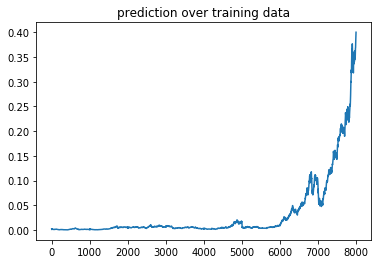

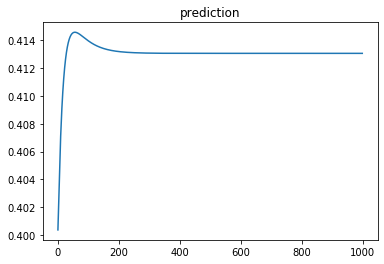

3740 	MSE 2.7322217e-06


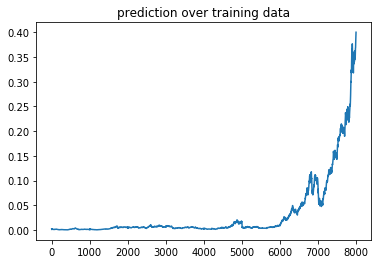

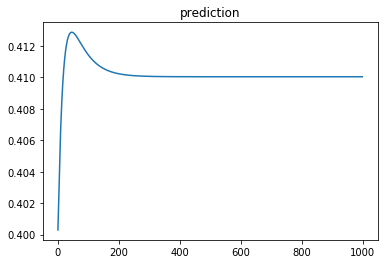

3760 	MSE 2.7274477e-06


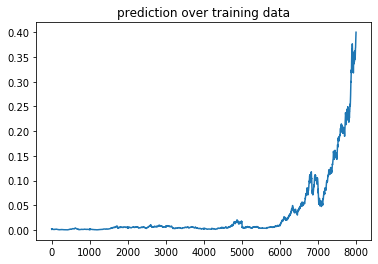

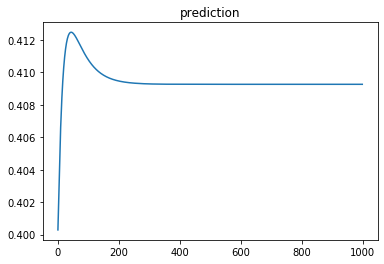

3780 	MSE 2.7228984e-06


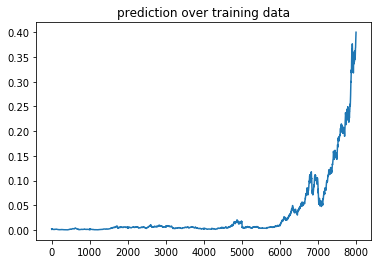

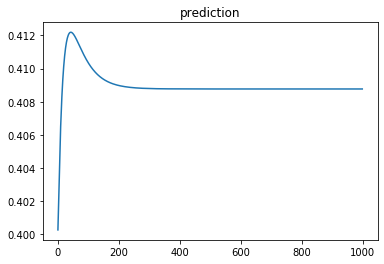

3800 	MSE 2.718572e-06


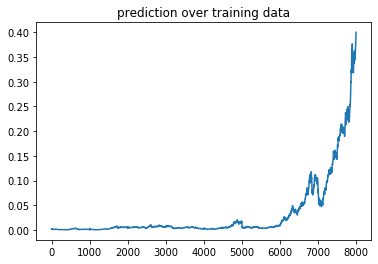

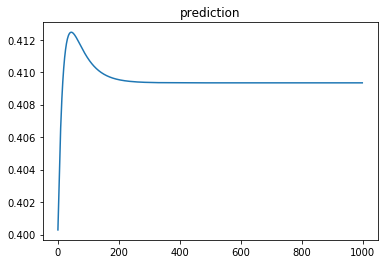

3820 	MSE 2.7337287e-06


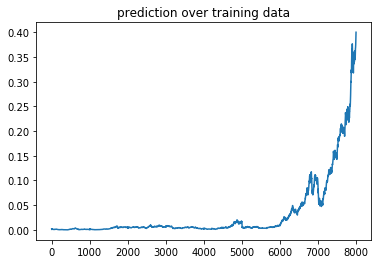

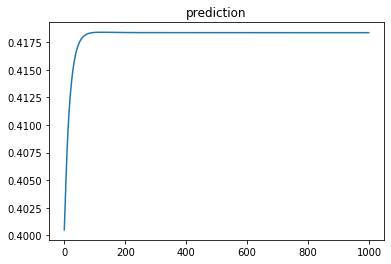

3840 	MSE 2.798859e-06


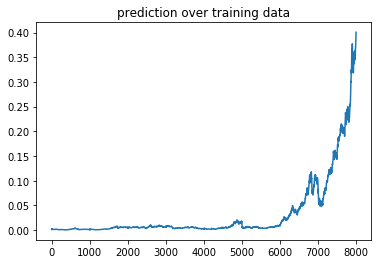

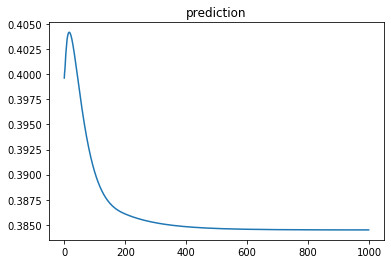

3860 	MSE 2.711678e-06


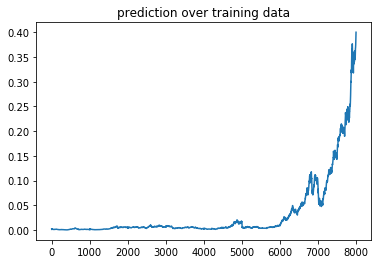

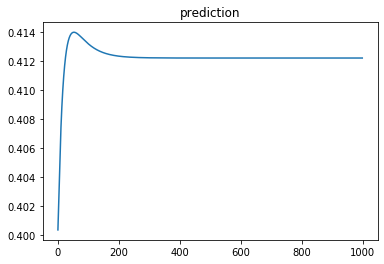

3880 	MSE 2.7034375e-06


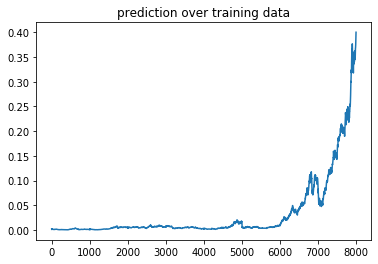

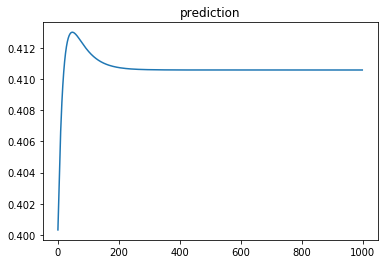

3900 	MSE 2.697594e-06


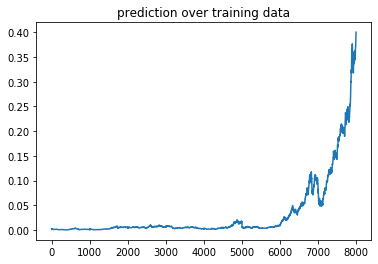

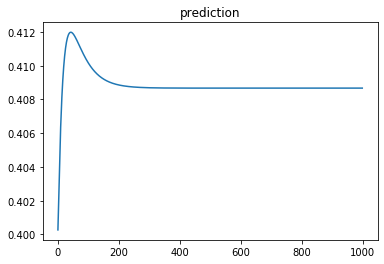

3920 	MSE 2.6932144e-06


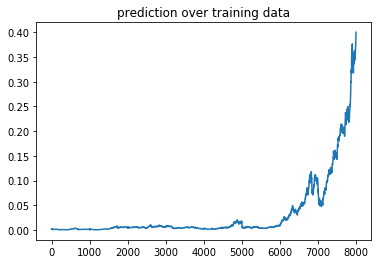

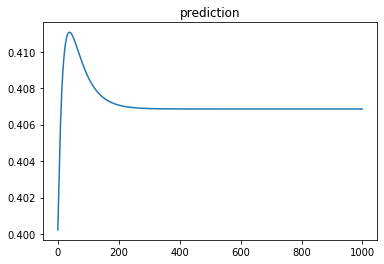

3940 	MSE 2.6890464e-06


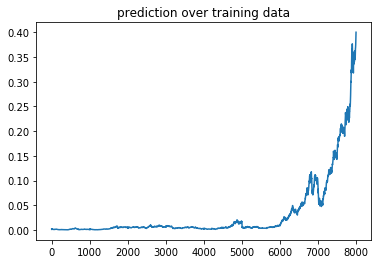

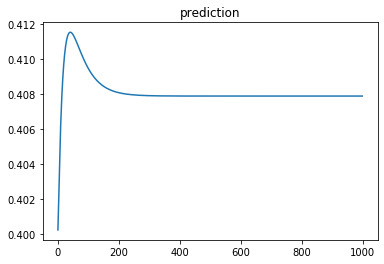

3960 	MSE 2.7283274e-06


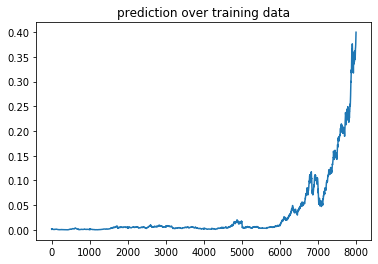

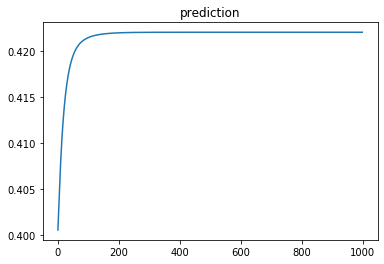

3980 	MSE 2.7002018e-06


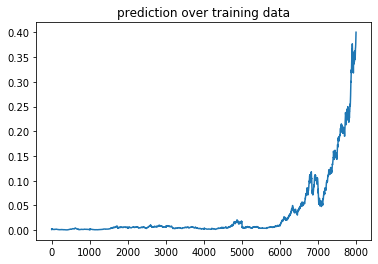

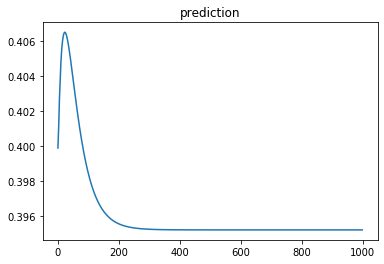

4000 	MSE 2.6855273e-06


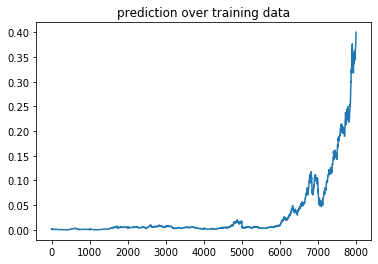

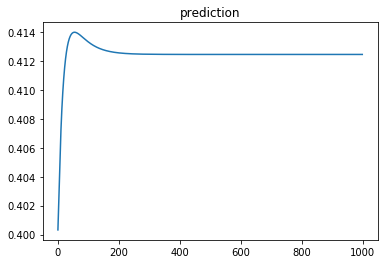

4020 	MSE 2.6748032e-06


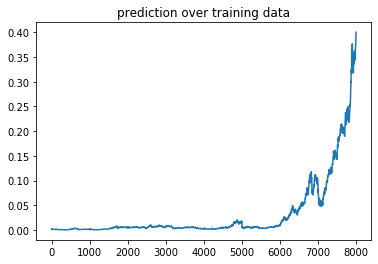

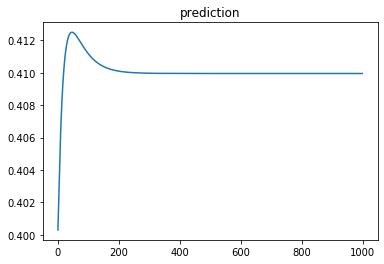

4040 	MSE 2.6691987e-06


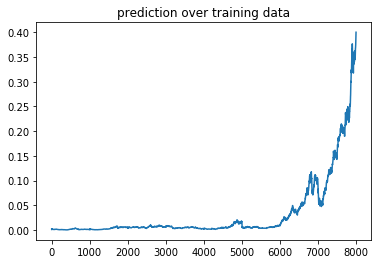

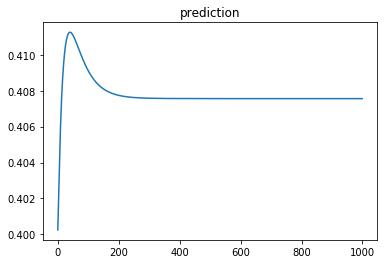

4060 	MSE 2.665187e-06


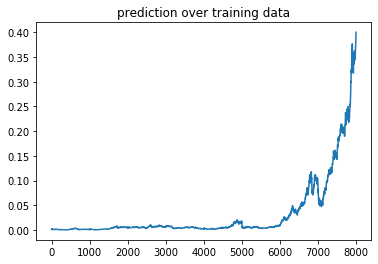

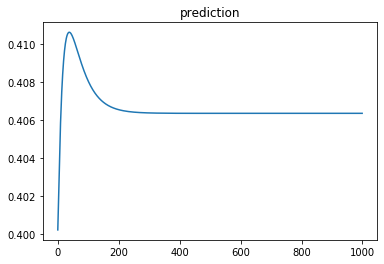

4080 	MSE 2.6629582e-06


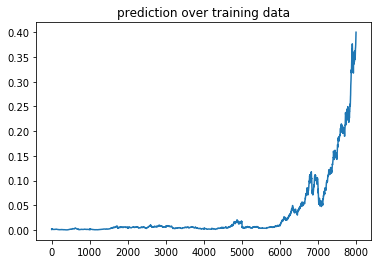

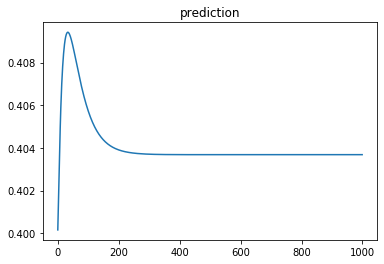

4100 	MSE 2.8780066e-06


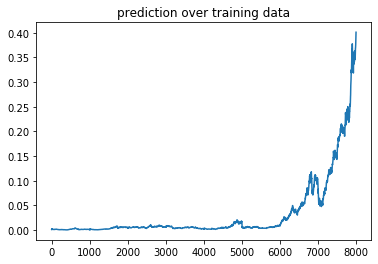

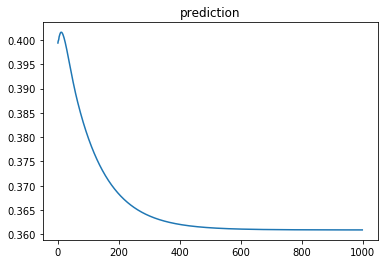

4120 	MSE 2.6695918e-06


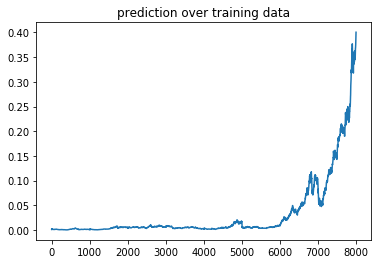

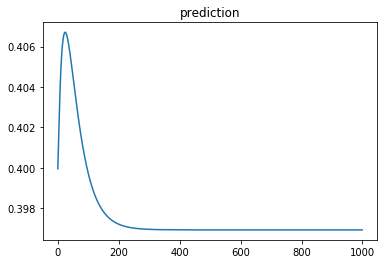

4140 	MSE 2.6509874e-06


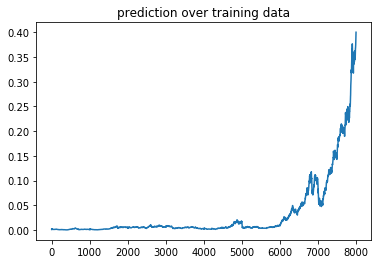

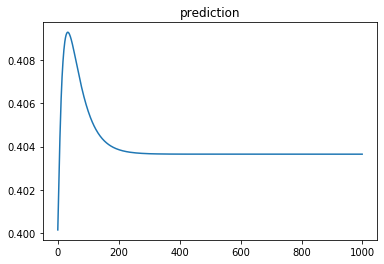

4160 	MSE 2.6467178e-06


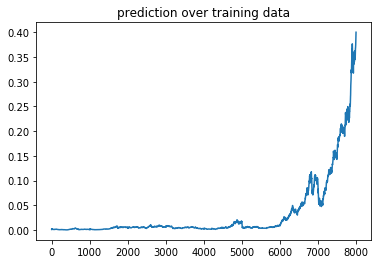

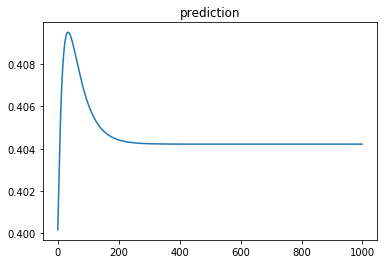

4180 	MSE 2.64246e-06


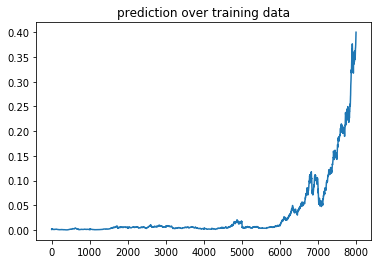

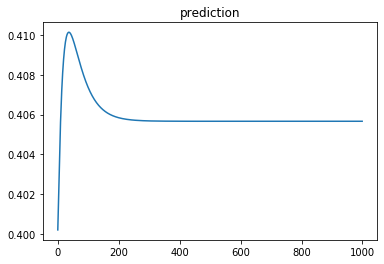

4200 	MSE 2.641188e-06


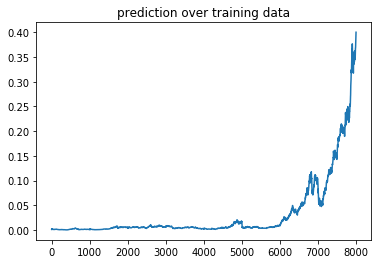

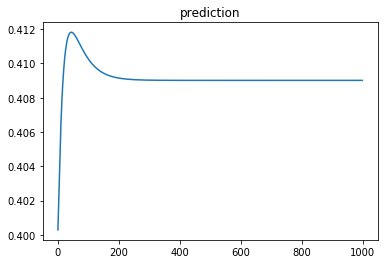

4220 	MSE 2.7231774e-06


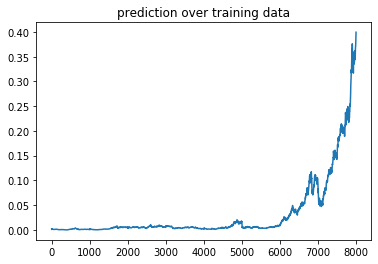

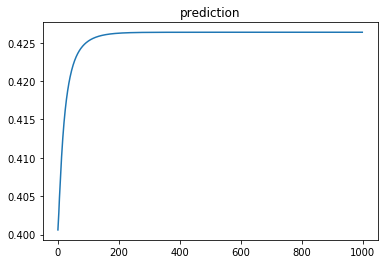

4240 	MSE 2.644607e-06


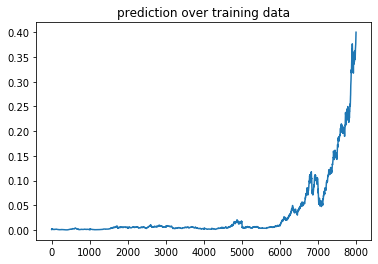

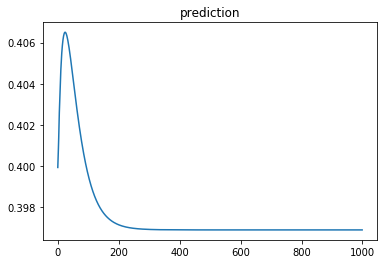

4260 	MSE 2.6316443e-06


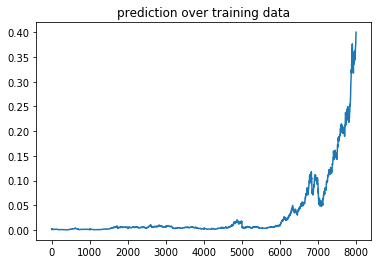

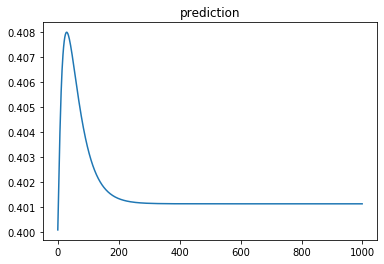

4280 	MSE 2.6249556e-06


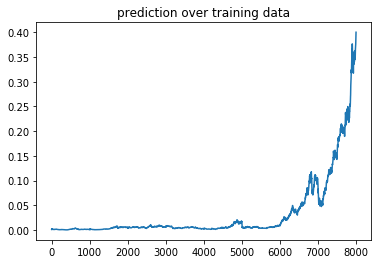

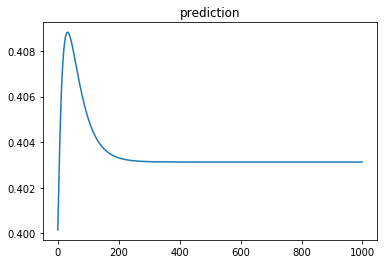

4300 	MSE 2.6208816e-06


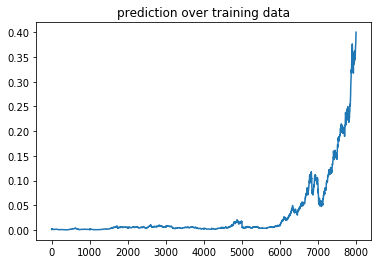

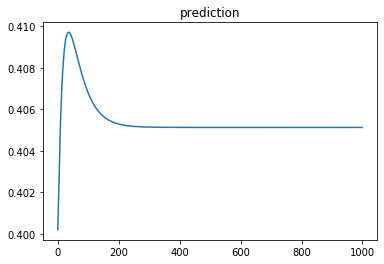

4320 	MSE 2.617476e-06


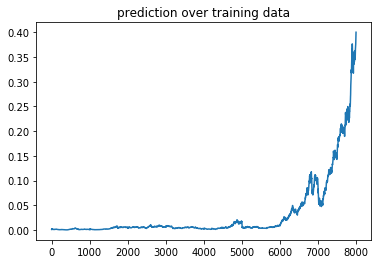

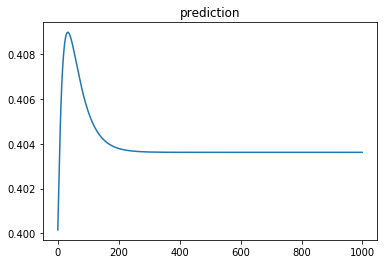

4340 	MSE 2.6813966e-06


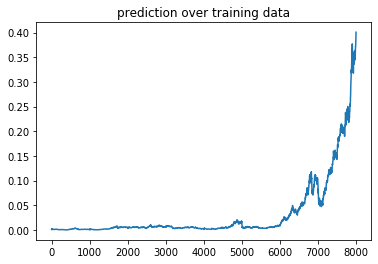

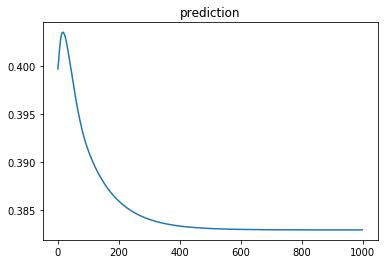

4360 	MSE 2.6222087e-06


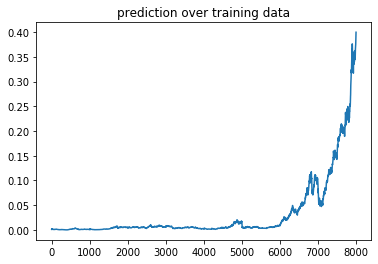

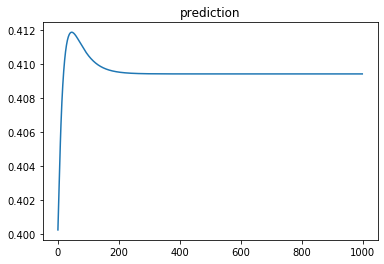

4380 	MSE 2.6076502e-06


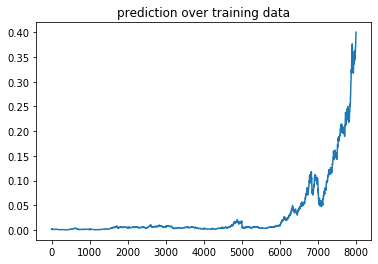

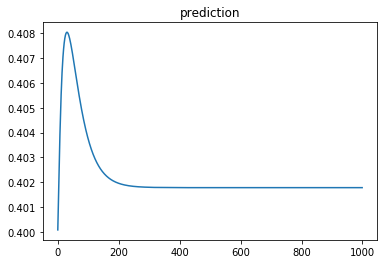

4400 	MSE 2.603732e-06


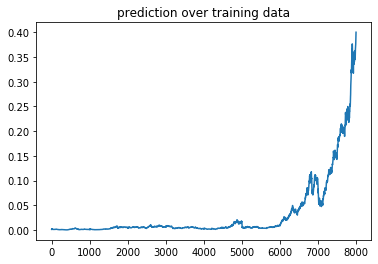

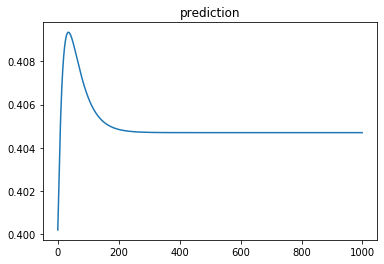

4420 	MSE 2.6000455e-06


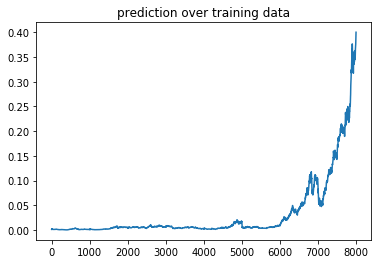

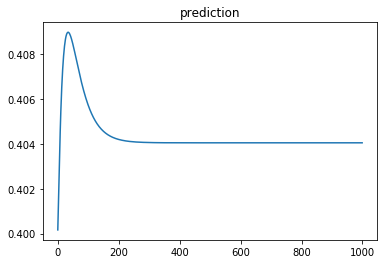

4440 	MSE 2.5973238e-06


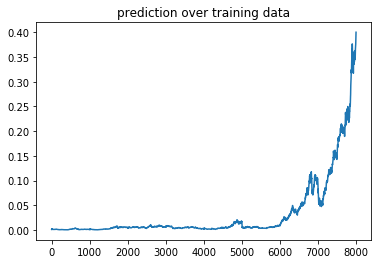

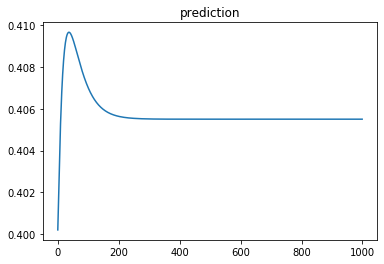

4460 	MSE 2.7901735e-06


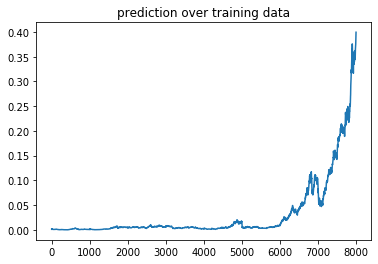

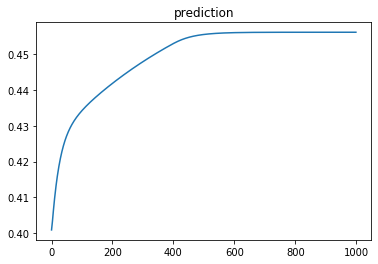

4480 	MSE 2.618723e-06


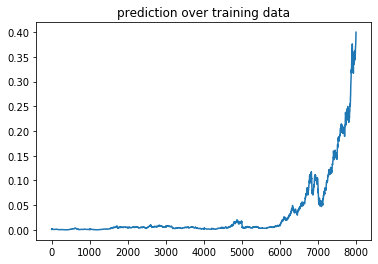

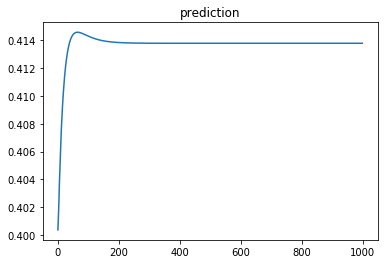

4500 	MSE 2.5923243e-06


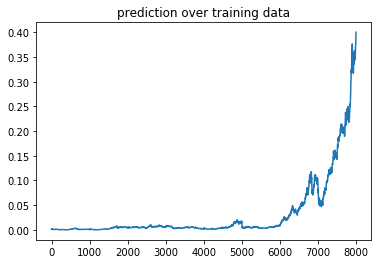

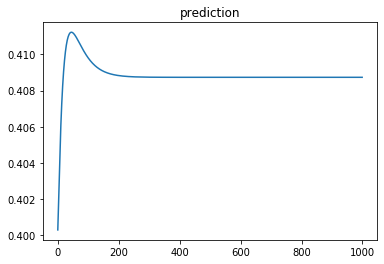

4520 	MSE 2.5835343e-06


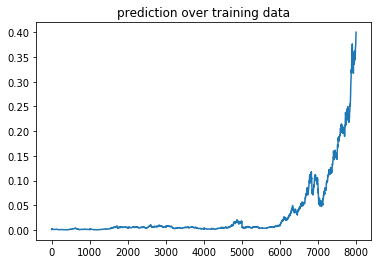

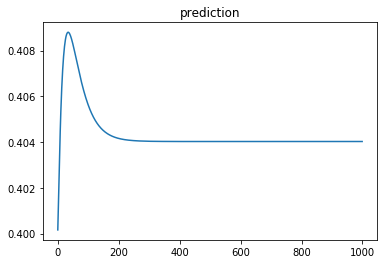

4540 	MSE 2.5799632e-06


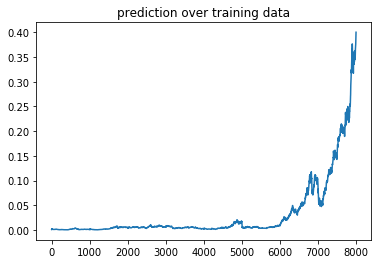

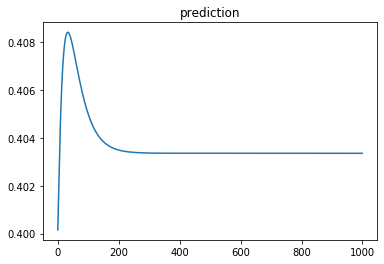

4560 	MSE 2.5787897e-06


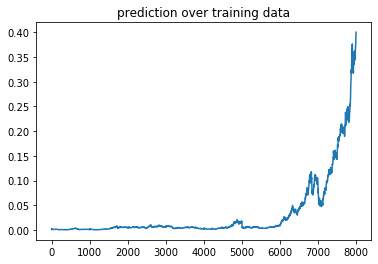

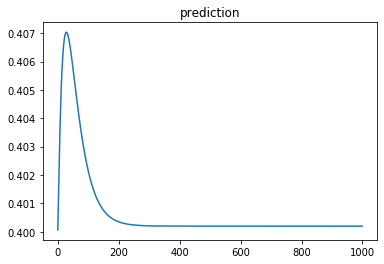

4580 	MSE 2.7690864e-06


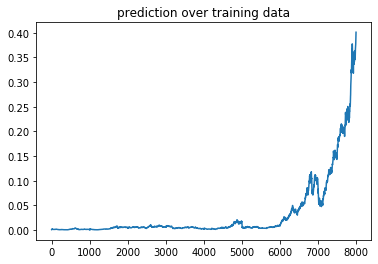

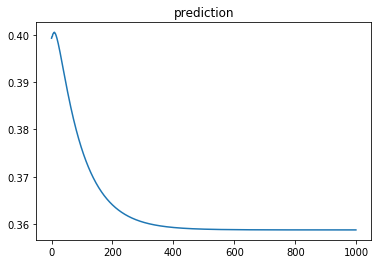

4600 	MSE 2.5729616e-06


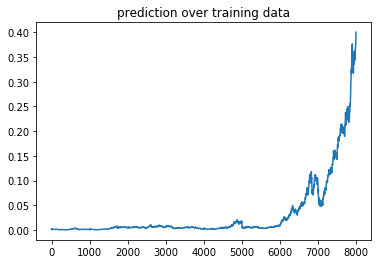

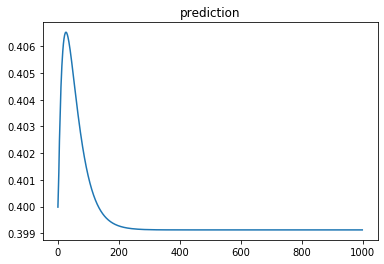

4620 	MSE 2.5671193e-06


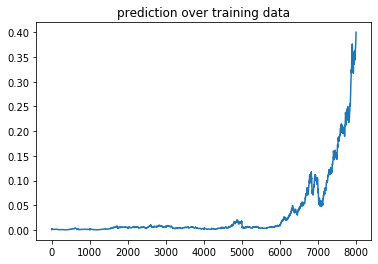

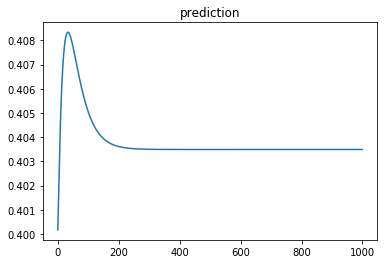

4640 	MSE 2.56447e-06


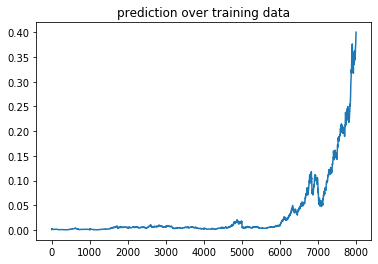

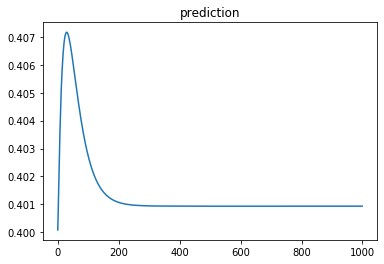

4660 	MSE 2.560775e-06


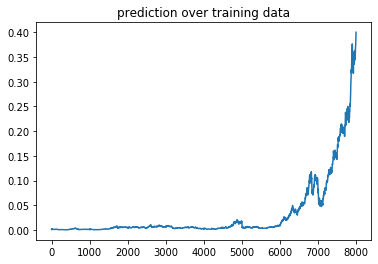

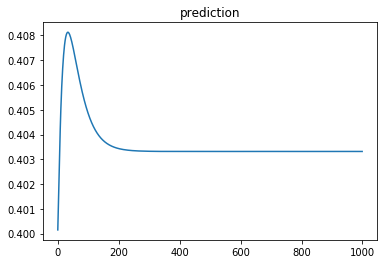

4680 	MSE 2.56062e-06


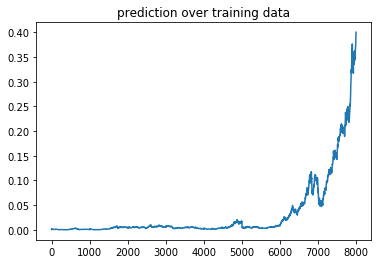

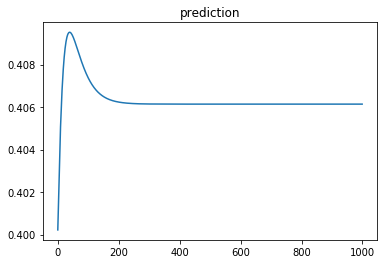

4700 	MSE 2.6707119e-06


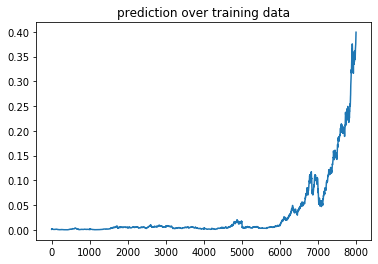

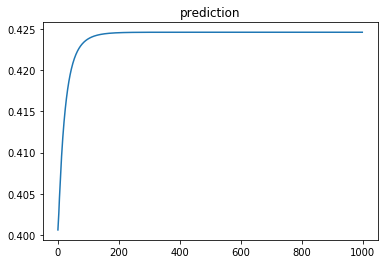

4720 	MSE 2.551572e-06


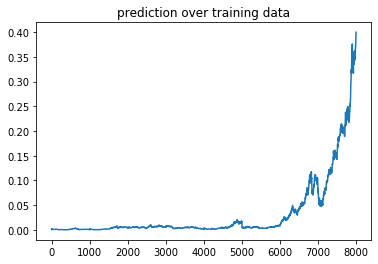

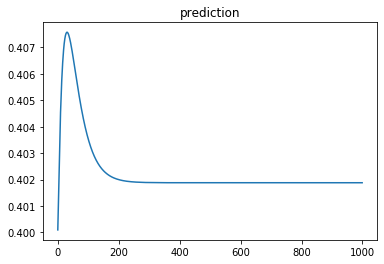

4740 	MSE 2.5482354e-06


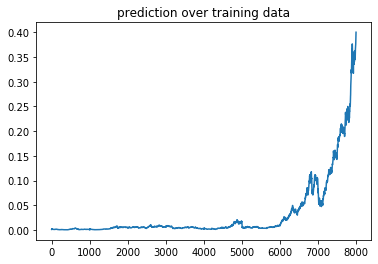

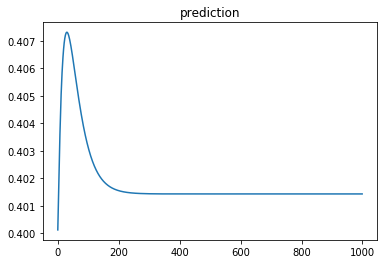

4760 	MSE 2.5460693e-06


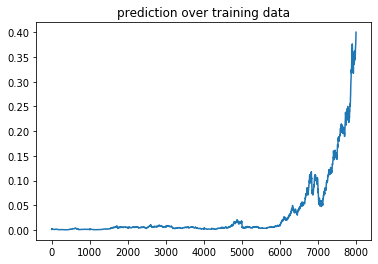

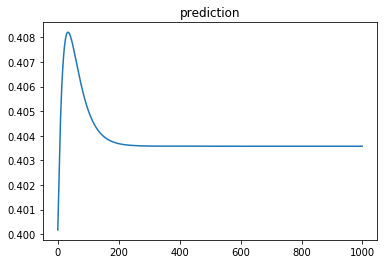

4780 	MSE 2.542126e-06


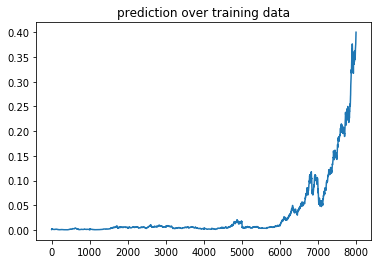

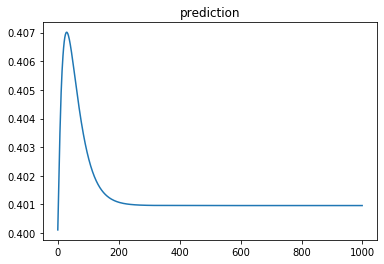

4800 	MSE 2.5566587e-06


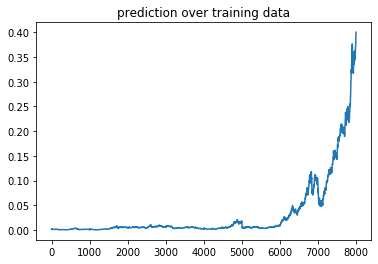

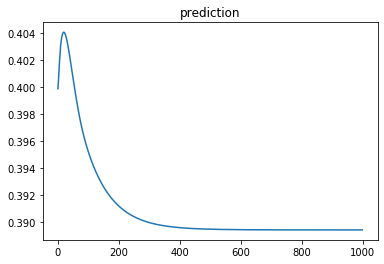

4820 	MSE 2.5959982e-06


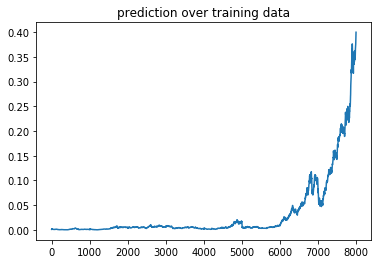

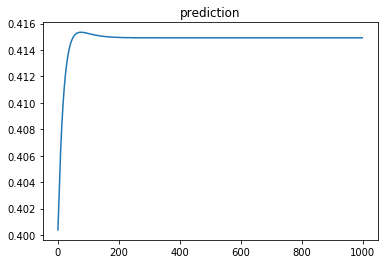

4840 	MSE 2.5445768e-06


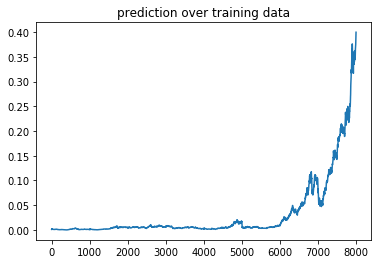

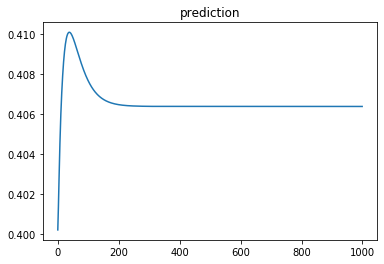

4860 	MSE 2.5312413e-06


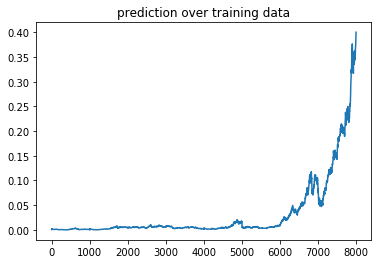

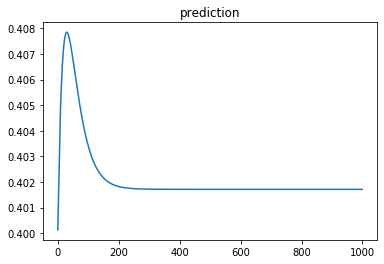

4880 	MSE 2.5271484e-06


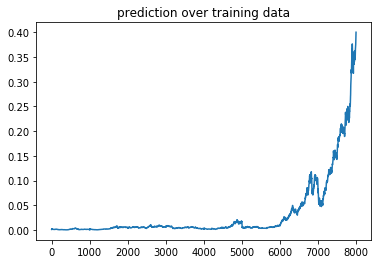

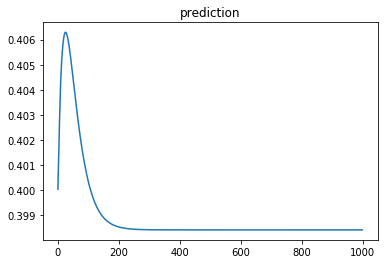

4900 	MSE 2.5243667e-06


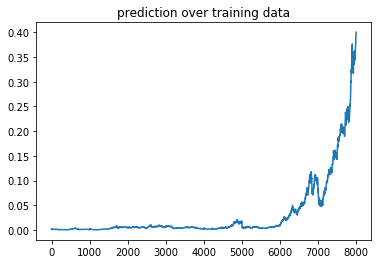

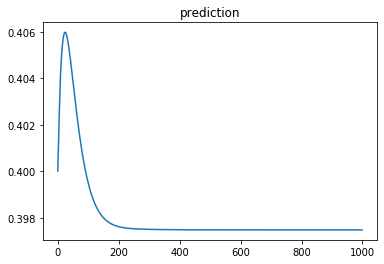

4920 	MSE 2.7229758e-06


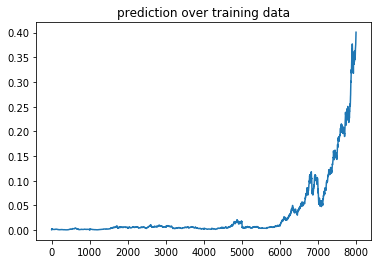

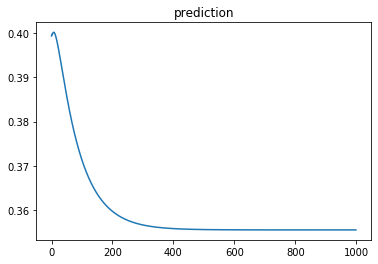

4940 	MSE 2.5557574e-06


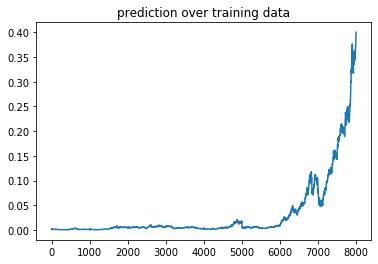

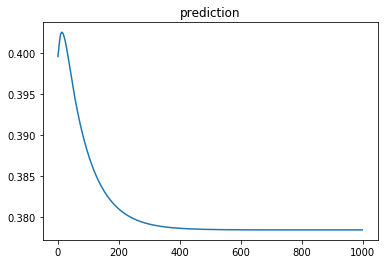

4960 	MSE 2.519055e-06


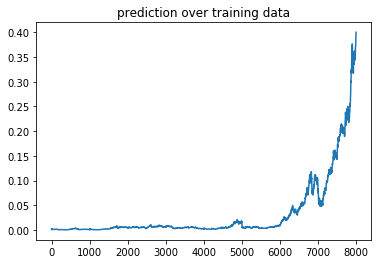

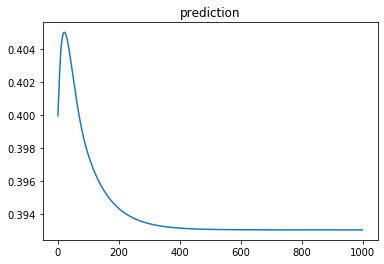

4980 	MSE 2.5130985e-06


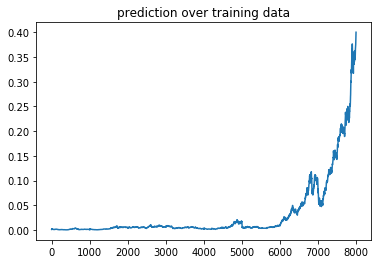

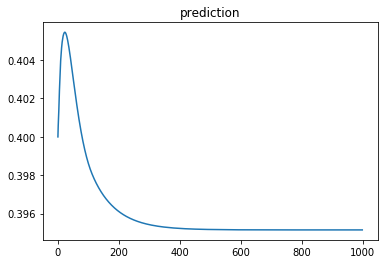

5000 	MSE 2.5092e-06


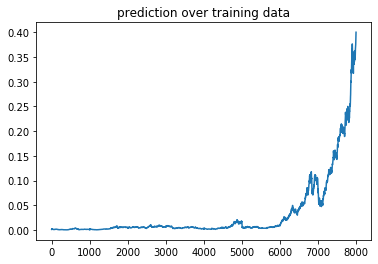

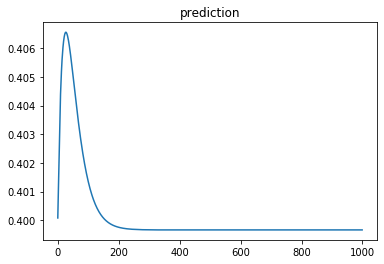

5020 	MSE 2.506296e-06


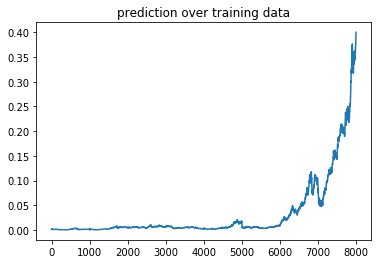

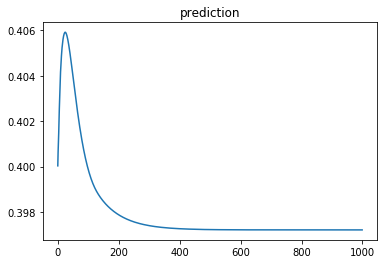

5040 	MSE 2.5967388e-06


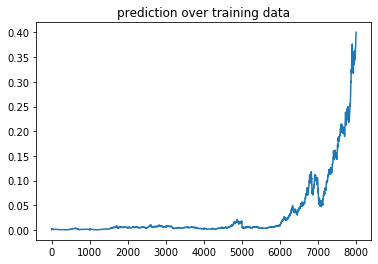

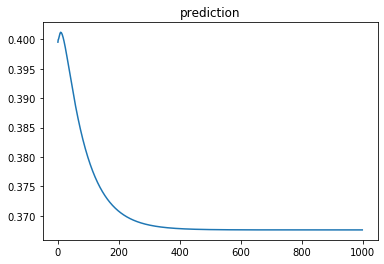

5060 	MSE 2.5131521e-06


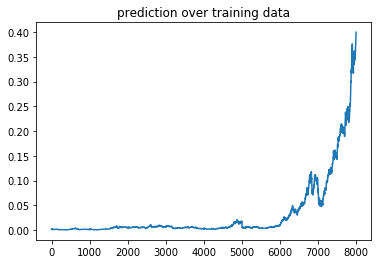

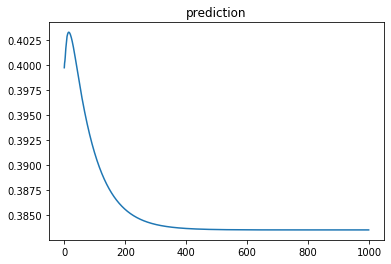

5080 	MSE 2.5042646e-06


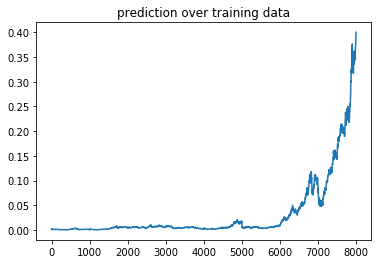

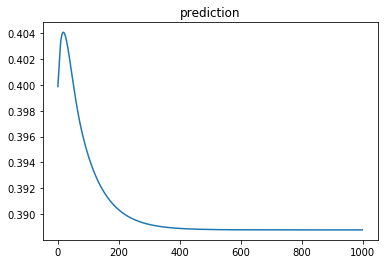

5100 	MSE 2.4951116e-06


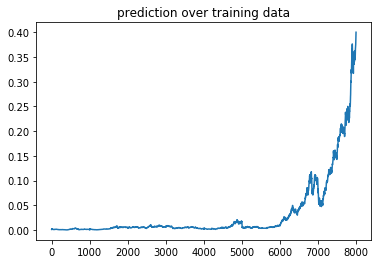

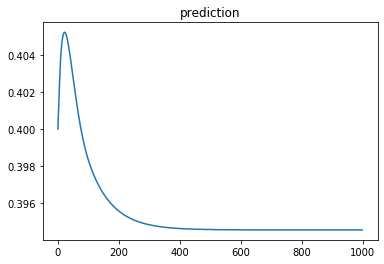

5120 	MSE 2.49222e-06


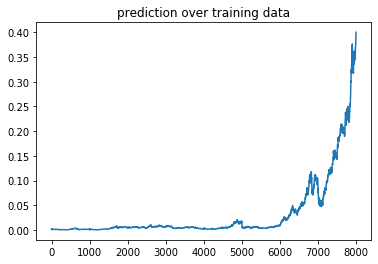

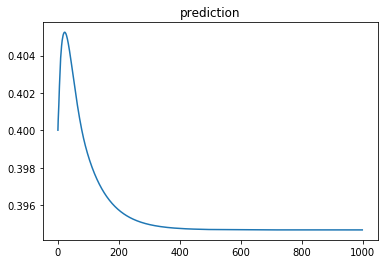

5140 	MSE 2.4892076e-06


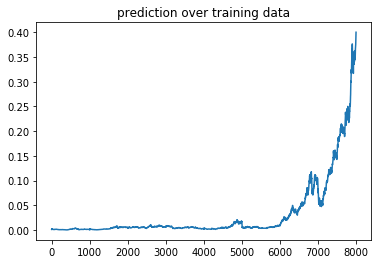

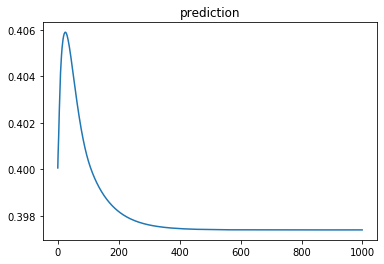

5160 	MSE 2.4865183e-06


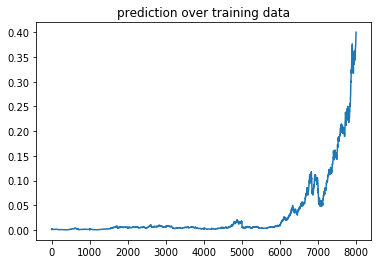

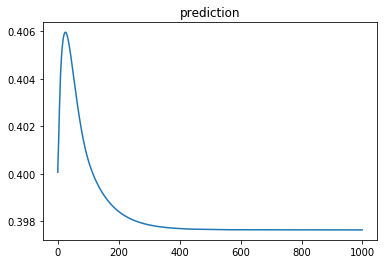

5180 	MSE 2.6245639e-06


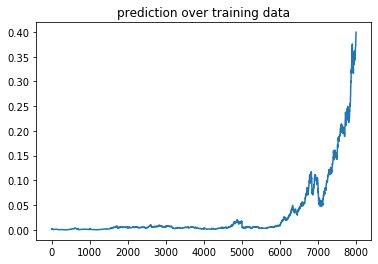

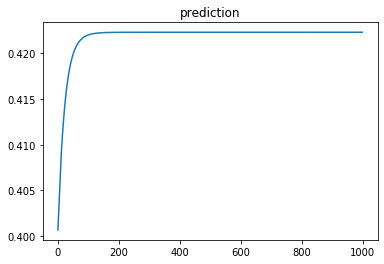

5200 	MSE 2.5503887e-06


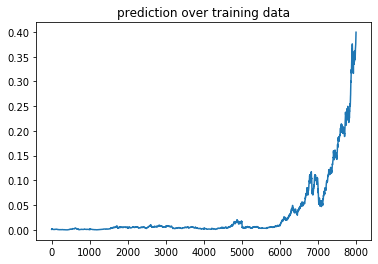

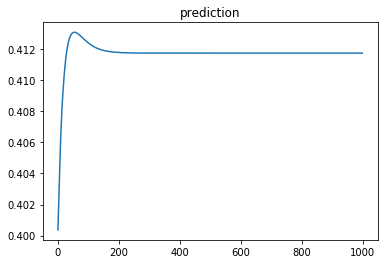

5220 	MSE 2.4834449e-06


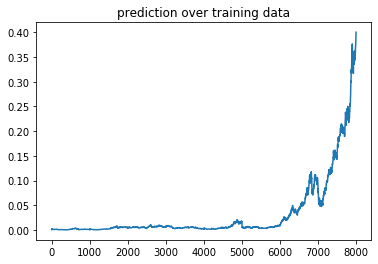

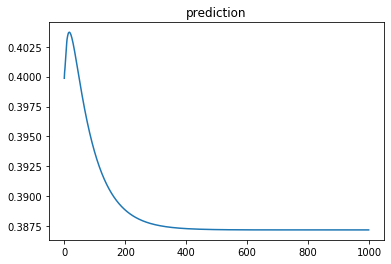

5240 	MSE 2.476229e-06


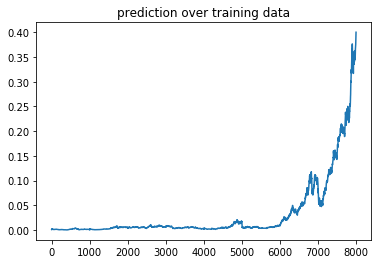

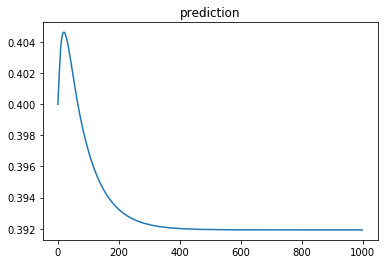

5260 	MSE 2.472785e-06


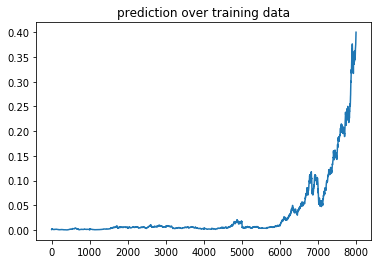

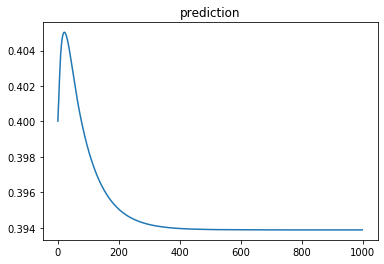

5280 	MSE 2.4699802e-06


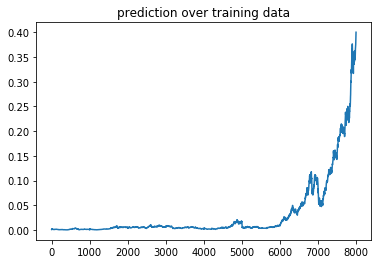

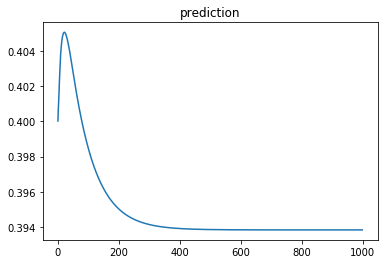

5300 	MSE 2.4672695e-06


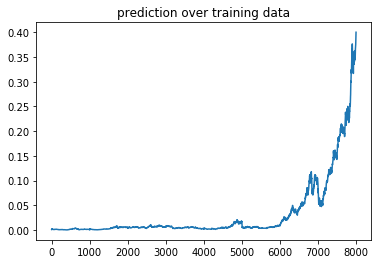

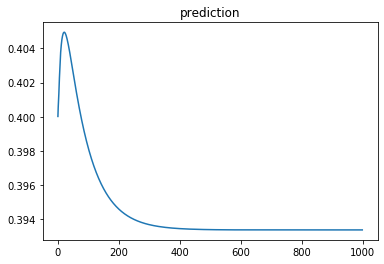

5320 	MSE 2.4758322e-06


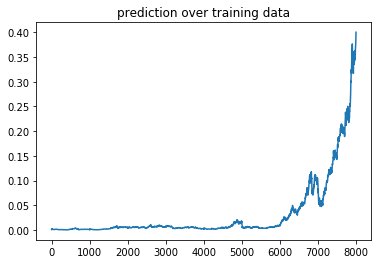

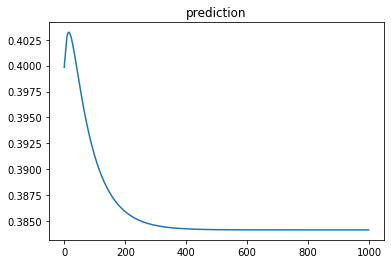

5340 	MSE 2.48238e-06


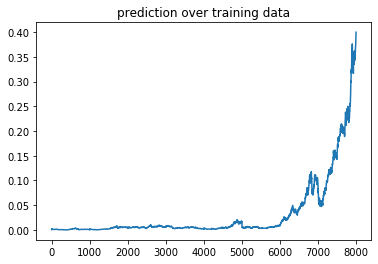

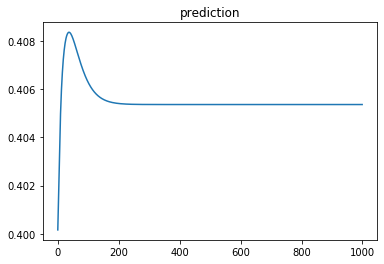

5360 	MSE 2.4724059e-06


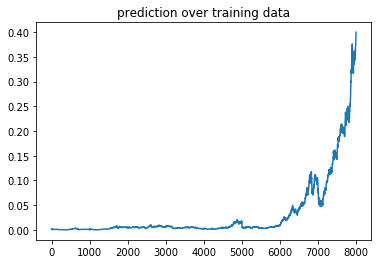

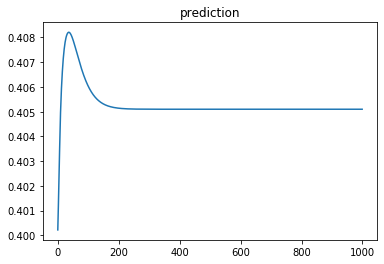

5380 	MSE 2.4581007e-06


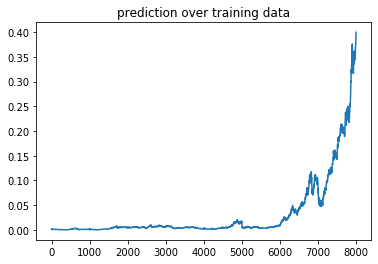

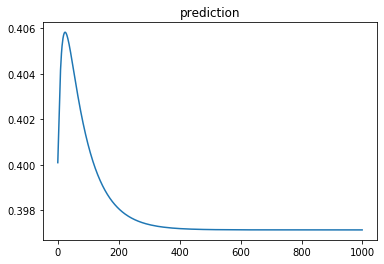

5400 	MSE 2.454415e-06


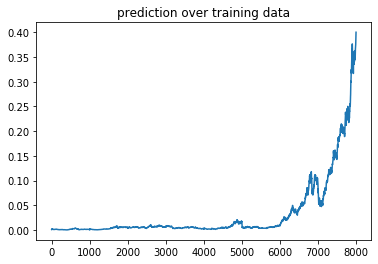

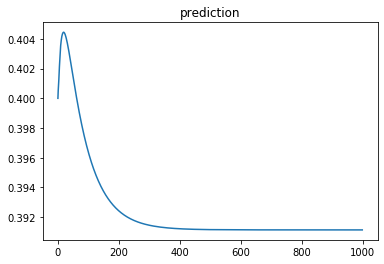

5420 	MSE 2.4512242e-06


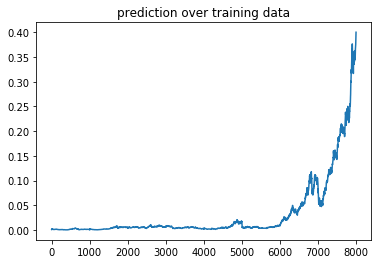

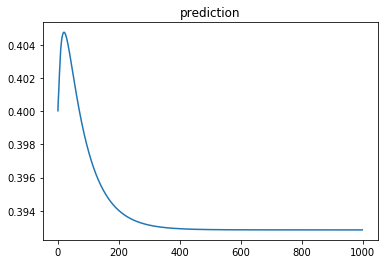

5440 	MSE 2.4487404e-06


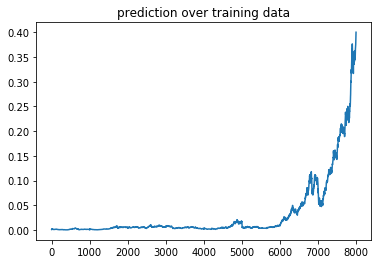

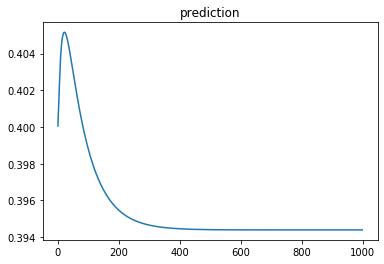

5460 	MSE 3.0647952e-06


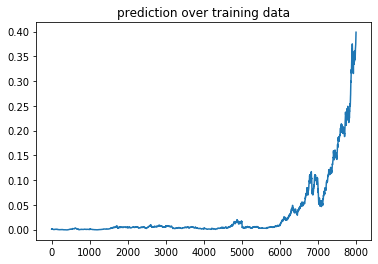

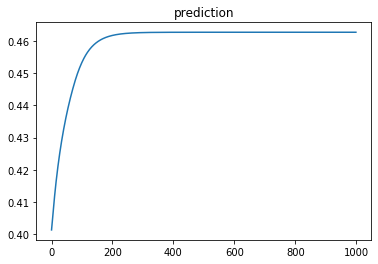

5480 	MSE 2.4482495e-06


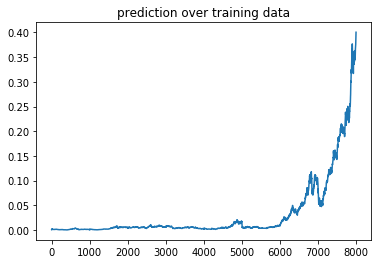

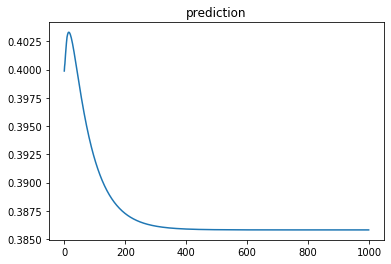

5500 	MSE 2.4492997e-06


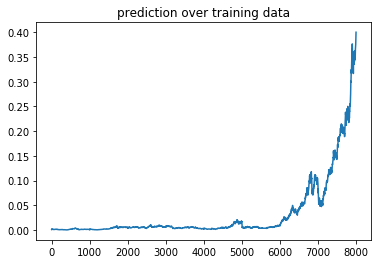

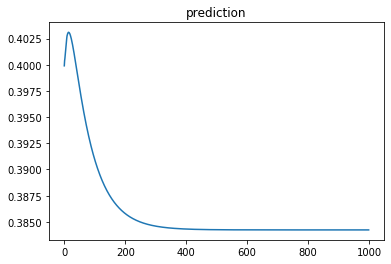

5520 	MSE 2.438978e-06


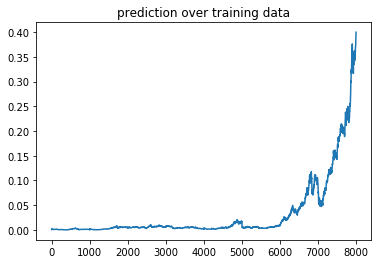

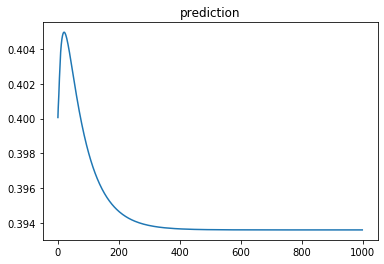

5540 	MSE 2.436049e-06


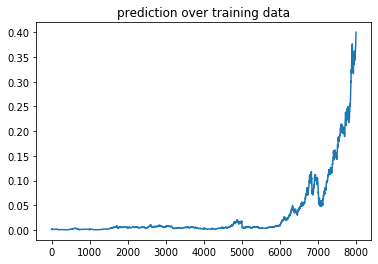

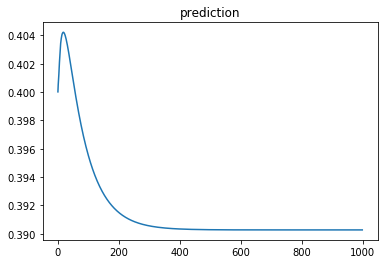

5560 	MSE 2.433417e-06


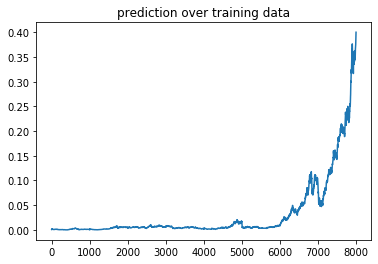

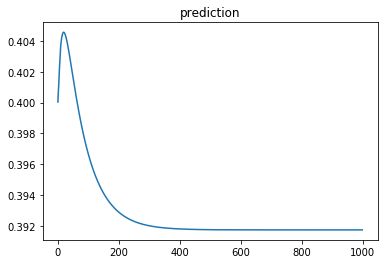

5580 	MSE 2.4308335e-06


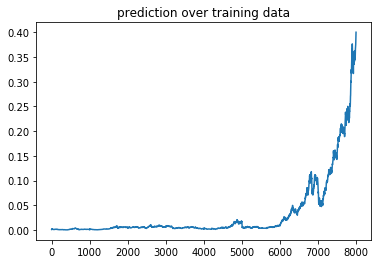

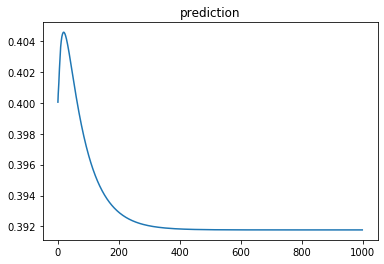

5600 	MSE 2.4283033e-06


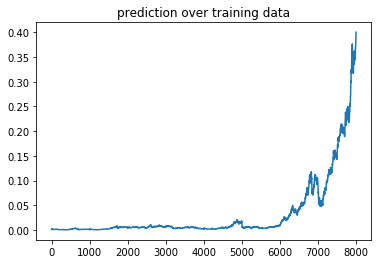

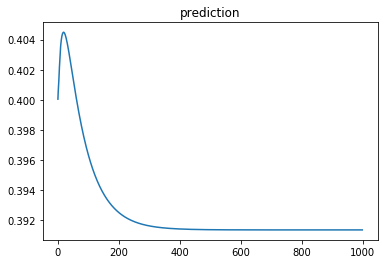

5620 	MSE 2.4257358e-06


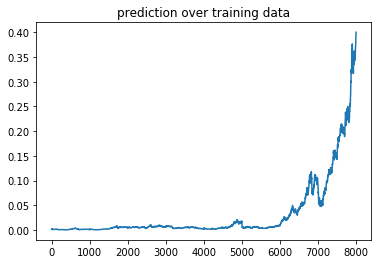

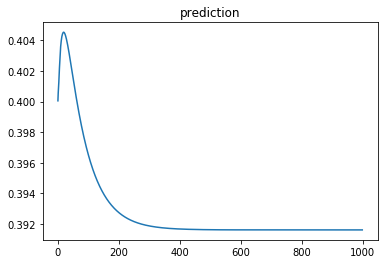

5640 	MSE 2.4232406e-06


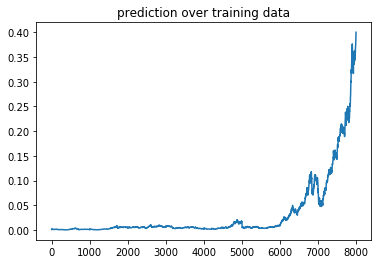

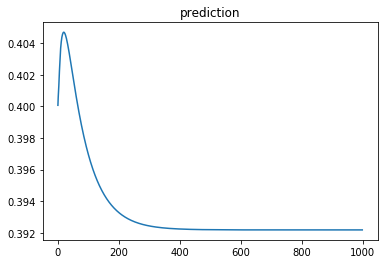

5660 	MSE 2.4714382e-06


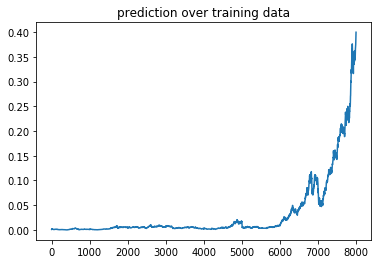

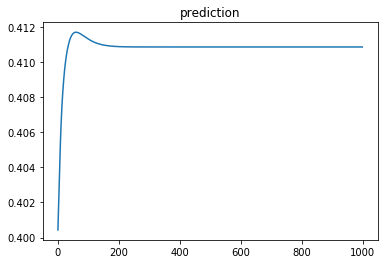

5680 	MSE 2.425417e-06


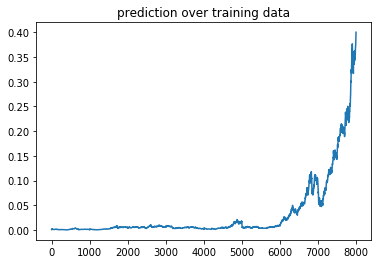

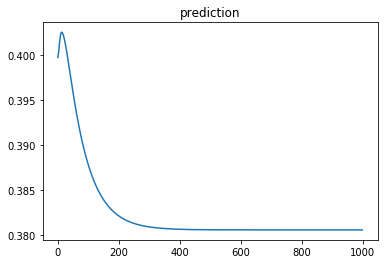

5700 	MSE 2.4264757e-06


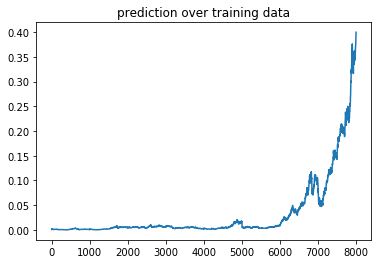

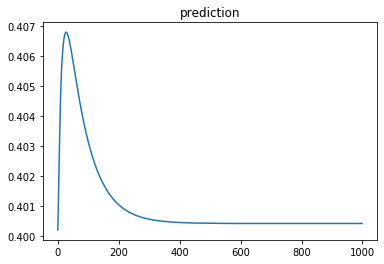

5720 	MSE 2.413355e-06


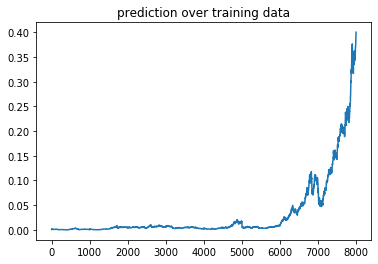

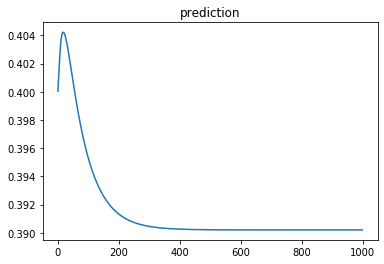

5740 	MSE 2.4108354e-06


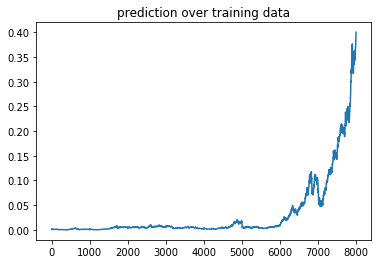

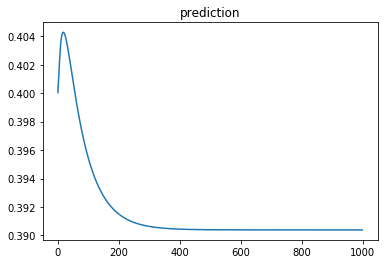

5760 	MSE 2.4083015e-06


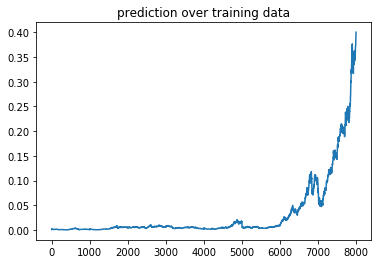

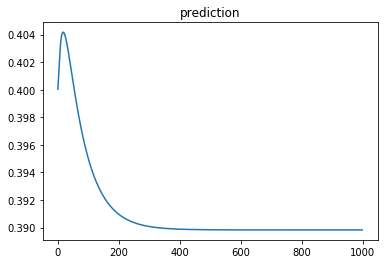

5780 	MSE 2.4059034e-06


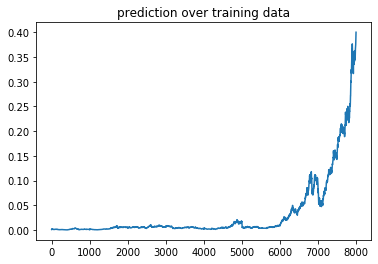

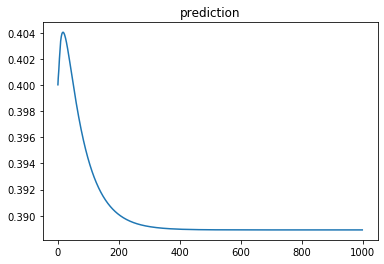

5800 	MSE 2.4404806e-06


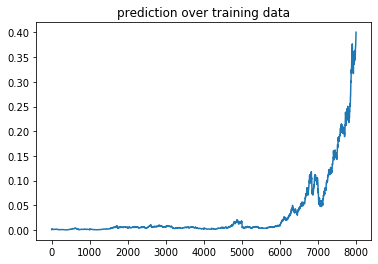

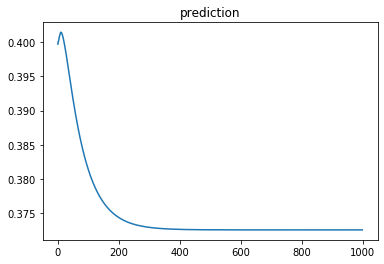

5820 	MSE 2.4444405e-06


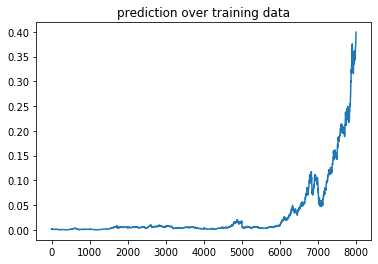

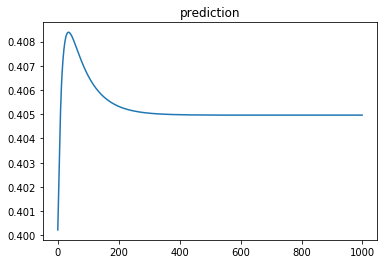

5840 	MSE 2.4082121e-06


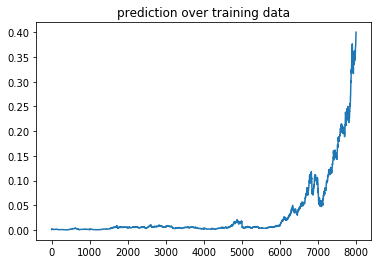

KeyboardInterrupt: ignored

In [16]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = dataX, dataY
        # prediction dimension [batch_size x t_steps x n_inputs]
        _, prediction =sess.run((training_op, outputs), feed_dict={X: X_batch, y: y_batch})
        if iteration % 20 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE", mse)
            # roll out prediction dimension into a single dimension
            prediction = np.reshape(prediction, (-1,))
            plt.plot(prediction)
            plt.title('prediction over training data')
            plt.show()
            
            # simulate the prediction for some time steps
            #sequence = [0.]*n_steps
            num_batches = X_batch.shape[0]
            sequence = X_batch[num_batches-1,:,:].reshape(-1).tolist()
            prediction_iter = 1000
            for iteration in range(prediction_iter):
                X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
                y_pred = sess.run(outputs, feed_dict={X: X_batch})
                sequence.append(y_pred[0, -1, 0])
            plt.plot(sequence[-prediction_iter:])
            plt.title('prediction')
            plt.show()